# 01 Frame Problem

## Defining the objective in business terms:

The objective of this project is to **develop a machine learning model** that enables businesses to automatically identify and **prevent fraudulent financial transactions**. By leveraging synthetic data to simulate real-world fraud scenarios, the model aims to:

- **Reduce financial losses** caused by fraud by quickly detecting fraudulent activities.
- **Improve operational efficiency** by automating fraud detection processes, allowing businesses to focus on legitimate transactions.
- **Enhance customer trust** by ensuring secure and reliable transactions, which can result in better customer retention and brand reputation.
- **Minimize false positives**, reducing the number of legitimate transactions wrongly flagged as fraud, thus avoiding customer dissatisfaction and unnecessary manual reviews.

This solution will help businesses protect their assets, reduce fraud-related risks, and ensure smoother financial operations.

## How will your solution be used?

The model will be integrated into **financial transaction systems** to automatically detect fraudulent transactions in real-time. It will flag suspicious transactions, generate alerts for further review, and provide detailed reporting on fraud patterns. The system can be continuously updated with new data to improve accuracy and can be customized to fit different businesses’ needs.

## What are the current solutions/workarounds (if any)?

- **Rule-Based Systems**: Predefined rules to flag suspicious transactions, but they often result in false positives.
- **Traditional ML Models**: Used for fraud detection, but struggle with imbalanced data and limited fraud examples.
- **Manual Reviews**: Time-consuming process for reviewing flagged transactions.
- **Anomaly Detection**: Detects outliers in transaction data but may miss complex fraud patterns.

## How should you frame this problem (supervised/unsupervised, online/offline,etc.)?

- **Supervised Learning**: Using labeled data to classify transactions as fraudulent or non-fraudulent.
- **Offline Learning**: Train the model on historical data, then deploy it for real-time use.
- **Online Inference**: Perform real-time fraud detection as new transactions come in.

## How should performance be measured?

- **Accuracy**: Proportion of correct predictions (fraudulent and non-fraudulent) out of all predictions.
- **Precision**: The percentage of flagged fraudulent transactions that are actually fraudulent.
- **Recall**: The percentage of actual fraudulent transactions correctly identified by the model.
- **F1-Score**: The harmonic mean of precision and recall, balancing false positives and false negatives.
- **AUC-ROC Curve**: Measures the model's ability to distinguish between classes across different thresholds.
- **Confusion Matrix**: Visualizes the number of true positives, false positives, true negatives, and false negatives.

## Is the performance measure aligned with the business objective?

Yes, the performance measures are aligned with the business objective of accurately **detecting fraudulent transactions** while **minimizing risks and costs**:

- **Accuracy**: Ensures the model correctly classifies transactions, directly impacting fraud detection effectiveness.
- **Precision**: Helps reduce false positives, preventing legitimate transactions from being wrongly flagged, which could lead to customer dissatisfaction and unnecessary investigations.
- **Recall**: Focuses on detecting as many fraudulent transactions as possible, minimizing financial losses from undetected fraud.
- **F1-Score**: Balances precision and recall, ensuring that the model performs well in both detecting fraud and avoiding false positives.
- **AUC-ROC Curve**: Measures the model's overall ability to distinguish between fraudulent and legitimate transactions, ensuring it performs well in real-world applications with varying thresholds.

## What would be the minimum performance needed to reach the business objective?

To meet the business objective of effectively detecting fraudulent transactions and minimizing operational risks, the following minimum performance thresholds are recommended:

- **Precision**: At least 90% to reduce false positives and avoid wrongly flagging legitimate transactions.
- **Recall**: At least 85% to ensure most fraudulent transactions are detected.
- **F1-Score**: At least 0.85 to balance precision and recall, ensuring the model maintains good detection capability while minimizing false positives.
- **AUC-ROC**: A minimum of 0.90 to ensure the model has a high ability to distinguish between fraudulent and non-fraudulent transactions.

## What are comparable problems? Can you reuse experience or tools? 

### Comparable Problems
- Credit Card Fraud Detection
- Insurance Fraud Detection
- E-commerce Fraud Detection
- Banking Fraud Detection

### Reusing Experience and Tools
- **ML Algorithms**: Random Forest, XGBoost, SVC.
- **Preprocessing**: Resampling, normalization, anomaly detection.
- **Evaluation Metrics**: Precision, Recall, F1-Score, AUC-ROC.

## Is human expertise available?

Yes, **Financial Experts** for domain knowledge and data labeling.

## How would you solve the problem manually?

- **Data Collection**: Manually gather transaction data, identifying characteristics of fraudulent and non-fraudulent transactions.
- **Rule-Based Filtering**: Create simple rules (e.g., large transaction amounts, unusual locations) to flag suspicious transactions.
- **Manual Review**: Review flagged transactions manually, investigating patterns and marking them as fraudulent or legitimate.
- **Pattern Recognition**: Identify common traits or behaviors in fraudulent transactions and apply them to future transactions for flagging.
- **Reporting**: Manually document and report the findings for further business action.

## List the assumptions you (or others) have made so far.

- Good amount of Data is available.
- Data can be imbalanced cause of different types of transactions.
- Features provide good predictive of fraud.

# 02 Data Collection

## List the data you need and how much you need.

We will use Financial data with these features:
- **Step**: maps a unit of time in the real world. In this case 1 step is 1 hour of time. Total steps 744 (30 days simulation).
- **Type**: CASH-IN, CASH-OUT, DEBIT, PAYMENT and TRANSFER.
- **Amount**: amount of the transaction in local currency.
- **Sender Balance**: initial balance before the transaction.
- **Receiver Balance**: initial balance recipient before the transaction. Note that there is not information for customers that start with M (Merchants).
- **isFraud**: is this transaction were considered as fraud or no.

We need approximatelly a IID balanced data with 100_000 transactions.

## Find and document where you can get that data

Data is available at <a href="https://www.kaggle.com/datasets/ealaxi/paysim1">kaggle</a> with additional features but not neseccary for fraud detection.

## Check how much space it will take

With all the 24 million transactions, It takes ~500 mb.

## Check legal obligations, and get authorization if necessary.

Its an open-source data.

## Get Data

Download data from kaggle should be located at **../data/PS_20174392719_1491204439457_log**

### NOTE: Transactions which are detected as fraud are cancelled, so for fraud detection these columns (oldbalanceOrg, newbalanceOrig, oldbalanceDest, newbalanceDest ) must not be used.

## Convert the data to a better format

In [1]:
import numpy as np
import pandas as pd

In [76]:
# Load CSV Data
data_path = r"../data/PS_20174392719_1491204439457_log.csv"
data = pd.read_csv(data_path,engine="pyarrow")

In [77]:
data.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


In [78]:
# Check Balance of Data
np.unique(data.isFraud,return_counts=True)

(array([0, 1], dtype=int64), array([6354407,    8213], dtype=int64))

What a bad imbalance betweem the two targets.

In [79]:
# Select Only Columns necessary for Fraud Detection
cols_to_select = ["step","type","amount","oldbalanceOrg","oldbalanceDest","isFraud"]
data = data[cols_to_select]

In [80]:
# Rename Columns
data.columns = ["MonthlyHour","Type","Amount","SenderBalance","ReceiverBalance","isFraud"]

In [81]:
# Check Each Type and number of records
import numpy as np
np.unique(data.Type,return_counts=True)

(array(['CASH_IN', 'CASH_OUT', 'DEBIT', 'PAYMENT', 'TRANSFER'],
       dtype=object),
 array([1399284, 2237500,   41432, 2151495,  532909], dtype=int64))

In [98]:
data.Type.unique()

array(['PAYMENT', 'TRANSFER', 'CASH_OUT', 'DEBIT', 'CASH_IN'],
      dtype=object)

In [124]:
# Select records with Balanced Transaction Type and Balanced Target
num_records_per_type = 10_000
sampled_data = []

for txn_type in data.Type.unique():
    # Filter data for the current transaction type
    good_data = data[(data.Type == txn_type) & (data.isFraud == 0)]
    bad_data = data[(data.Type == txn_type) & (data.isFraud == 1)]
    
    sampled_good = good_data.sample(n=min(len(good_data), num_records_per_type), random_state=42)
    
    # Oversample fraud data if necessary
    if len(bad_data) > 0:
        if len(bad_data) < num_records_per_type:
            sampled_bad = bad_data.sample(n=num_records_per_type, replace=True, random_state=42)
        else:
            sampled_bad = bad_data.sample(n=num_records_per_type, random_state=42)
    else:
        sampled_bad = pd.DataFrame()  # Empty DataFrame if no fraud records exist
    
    # Combine good and bad samples for the current transaction type
    current_sampled_data = pd.concat([sampled_good, sampled_bad], axis=0)
    
    # Append the current transaction type's sampled data to the list
    sampled_data.append(current_sampled_data)

# Combine all sampled data into a single DataFrame
sampled_data = pd.concat(sampled_data, axis=0)

# Reset the index after combining all the data
sampled_data.reset_index(drop=True, inplace=True)

print(f"Sampled data shape: {sampled_data.shape}")

Sampled data shape: (70000, 6)


In [122]:
sampled_data

,index,MonthlyHour,Type,Amount,SenderBalance,ReceiverBalance,isFraud
0,4272564,307,PAYMENT,18505.16,9141.0,0.00,0
1,2697361,211,PAYMENT,289.33,1697.0,0.00,0
2,982284,44,PAYMENT,11260.18,104701.0,0.00,0
3,2190099,185,PAYMENT,6479.49,0.0,0.00,0
4,5536099,381,PAYMENT,3397.28,41722.0,0.00,0
...,...,...,...,...,...,...,...
3662206,6362253,718,CASH_IN,188888.89,51838.0,0.00,0
3662207,6362271,718,CASH_IN,27919.60,2413.0,512791.59,0
3662208,6362279,718,CASH_IN,78988.38,204464.0,108724.19,0
3662209,6362298,718,CASH_IN,18000.26,63409.0,28088.61,0


<Axes: xlabel='count', ylabel='Type'>

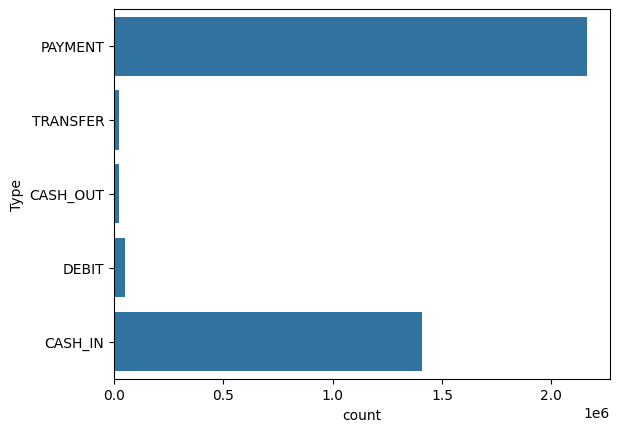

In [123]:
sns.countplot(sampled_data.Type)

In [120]:
np.unique(sampled_data.isFraud.values,return_counts=True)

(array([0], dtype=int64), array([3622211], dtype=int64))

## Ensure sensitive information is deleted or protected

Its a Synthetic data.

## Check the size and type of data

Its a **time series** data cause each transaction is associated with a timestamp.

Contains **24 million** financial records.

## Sample a test set

In [19]:
from sklearn.model_selection import train_test_split
train_data,test_data = train_test_split(sampled_data,stratify=sampled_data.isFraud,test_size=0.1,random_state=42)

In [20]:
train_data.to_csv("../data/train_data.csv",index=False)
test_data.to_csv("../data/test_data.csv",index=False)

# 03 Data Exploration

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns;sns.set()

In [2]:
from warnings import filterwarnings
filterwarnings(action="ignore")

In [3]:
# Load Training data
data = pd.read_csv("../data/train_data.csv")
data.head()

,MonthlyHour,Type,Amount,SenderBalance,ReceiverBalance,isFraud
0,18,TRANSFER,185179.51,0.00,666160.16,0
1,185,DEBIT,18996.03,534.00,218943.42,0
2,306,PAYMENT,1249.91,101240.78,0.00,0
3,227,CASH_OUT,80870.17,0.00,98974.08,0
4,34,CASH_OUT,30917.39,30917.39,339926.42,1


In [4]:
# Number of Rows and Cols in Data
print("Rows:{}\nCols:{}".format(*data.shape))

Rows:75600
Cols:6


## Basic infos about the dataset

In [5]:
# Memory Usage in megabytes
print(f"Dataset's memory size: {data.memory_usage().sum()/1e6:.1f} MB")

Dataset's memory size: 3.6 MB


In [6]:
# Dataset's Shape & Size
print(f"Number of Columns: {data.shape[1]}")
print(f"Number of Rows(observations): {data.shape[0]}")

print(f"Size: {data.size}")

Number of Columns: 6
Number of Rows(observations): 75600
Size: 453600


In [7]:
# Features(Columns)'s data types
print(data.dtypes)

MonthlyHour          int64
Type                object
Amount             float64
SenderBalance      float64
ReceiverBalance    float64
isFraud              int64
dtype: object


In [8]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 75600 entries, 0 to 75599
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   MonthlyHour      75600 non-null  int64  
 1   Type             75600 non-null  object 
 2   Amount           75600 non-null  float64
 3   SenderBalance    75600 non-null  float64
 4   ReceiverBalance  75600 non-null  float64
 5   isFraud          75600 non-null  int64  
dtypes: float64(3), int64(2), object(1)
memory usage: 3.5+ MB
None


We conclude that:
- It takes only ~4 mb of memory. 
- It is clean.
- It contains 5 Numerical Features and 1 Categorical.

## Univariate Analysis

### Monthly Hour

In [9]:
monthly_hour = data.MonthlyHour
# Data Type
print("Data Type:",monthly_hour.dtype,", Bounded between 0 and 744")

Data Type: int64 , Bounded between 0 and 744


In [10]:
monthly_hour.describe()

count    75600.000000
mean       279.709048
std        176.663143
min          1.000000
25%        158.000000
50%        260.000000
75%        376.000000
max        743.000000
Name: MonthlyHour, dtype: float64

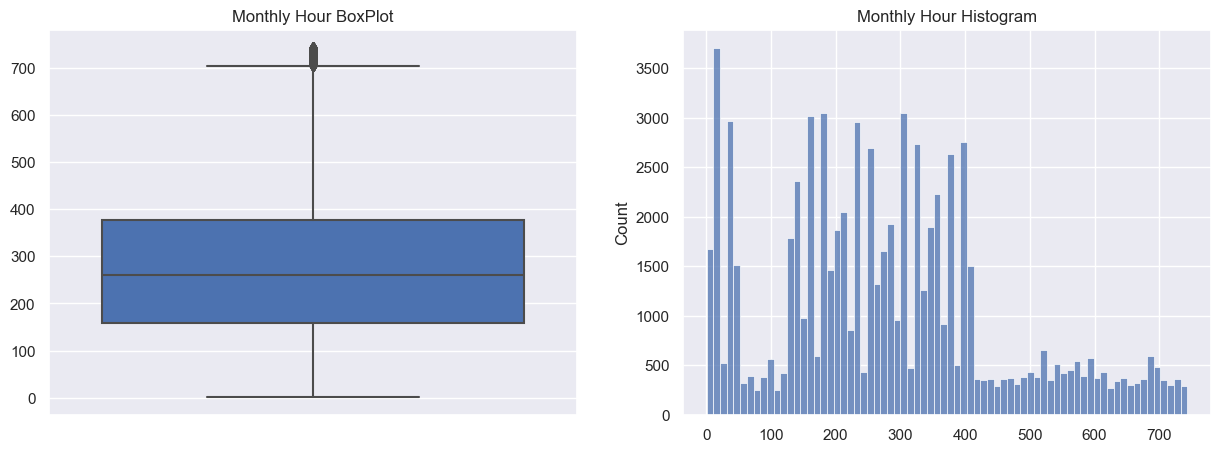

Kurtosis: -0.13786260536653572
Skewness: 0.5465849540976039


In [11]:
# Noisiness and type of noise
fig,axs = plt.subplots(1,2,figsize=(15,5))
sns.boxplot(y=monthly_hour.values,ax=axs[0],saturation=1)
sns.histplot(monthly_hour.values,ax=axs[1])
axs[0].set_title("Monthly Hour BoxPlot")
axs[1].set_title("Monthly Hour Histogram")

plt.savefig("../visualizations/exploration/monthly_hour.png", dpi=300, bbox_inches='tight')
plt.show()

# Kurtosis & Skewness
print("Kurtosis:",monthly_hour.kurtosis())
print("Skewness:",monthly_hour.skew())

We see that:
- Distribution follows **N~(244,20736)**
- Distribution is **platykurtic**, with thinner tails and fewer outliers.
- Distribution is **skewered to right** so outliers are more in the right side.

In [12]:
Q1 = monthly_hour.quantile(.25)
Q3 = monthly_hour.quantile(.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5*IQR
upper_bound = Q3 + 1.5*IQR
print(f"IQR: {IQR}\nUpper Bound: {upper_bound}\nLower Bound: {lower_bound}")

IQR: 218.0
Upper Bound: 703.0
Lower Bound: -169.0


In [13]:
# Outlier detection Using IQR
iqr_outliers = monthly_hour[(monthly_hour > upper_bound) |  (monthly_hour < lower_bound)]
print("Number of IQR Outliers: ",iqr_outliers.count())
print("IQR Outliers: ",iqr_outliers.index)

Number of IQR Outliers:  1250
IQR Outliers:  Index([    5,   347,   429,   441,   466,   489,   609,   628,   651,   655,
       ...
       75281, 75298, 75349, 75382, 75417, 75491, 75509, 75531, 75553, 75583],
      dtype='int64', length=1250)


In [14]:
# Outlier detection Using ZScore
from scipy.stats import zscore
zscores = zscore(monthly_hour)
zscore_outliers = monthly_hour[zscores.abs() > 3]
print("Number of ZScore Outliers: ",zscore_outliers.count())
print("ZScore Outliers: ",zscore_outliers.index)

Number of ZScore Outliers:  0
ZScore Outliers:  Index([], dtype='int64')


We will remove some iqr outliers

In [15]:
# Remove IQR Outliers
data = data[~data.index.isin(np.random.choice(iqr_outliers,size=400))]

In [16]:
# Usefulness for the task
print("Correlation Cofficient: ",round(data.isFraud.corr(monthly_hour)*100,2),"%")

Correlation Cofficient:  32.07 %


The variables are dependent, with relationship 32% between them.<br>
So **Monthly Hour** has a middle impact on the target.

### Type

In [17]:
type = data.Type
# Data Type
print("Data Type:",type.dtype)
# Unique Values
print("Unique Values",type.unique())

Data Type: object
Unique Values ['TRANSFER' 'DEBIT' 'PAYMENT' 'CASH_OUT' 'CASH_IN']


In [18]:
type.describe()

count        75560
unique           5
top       TRANSFER
freq         21597
Name: Type, dtype: object

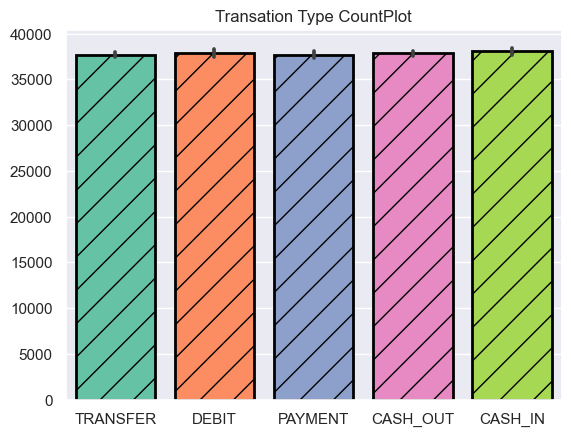

In [19]:
sns.barplot(y=type.index,x=type.values,palette="Set2",saturation=1,lw=2,ec="black",hatch="/")
plt.title("Transation Type CountPlot")

plt.savefig("../visualizations/exploration/transaction_type.png", dpi=300, bbox_inches='tight')
plt.show()

We see that:
- Distribution follows Discrete **U~(0,5)**

from the count plot its obvious there is no outliers.

In [20]:
# Usefulness for the task
print("Correlation Cofficient: ",round(data.isFraud.corr(data.Type.map(dict(zip(data.Type.unique(),range(0,5)))))*100,2),"%")

Correlation Cofficient:  -15.64 %


The variables are small dependent, with -16% relationship between them.<br>
So **Type** has a small impact on the target.

### Amount

In [21]:
amount = data.Amount
# Data Type
print("Data Type:",amount.dtype,", Positive.")

Data Type: float64 , Positive.


In [22]:
amount.describe()

count    7.556000e+04
mean     5.964533e+05
std      1.565088e+06
min      0.000000e+00
25%      1.283995e+04
50%      1.246970e+05
75%      3.989962e+05
max      4.363841e+07
Name: Amount, dtype: float64

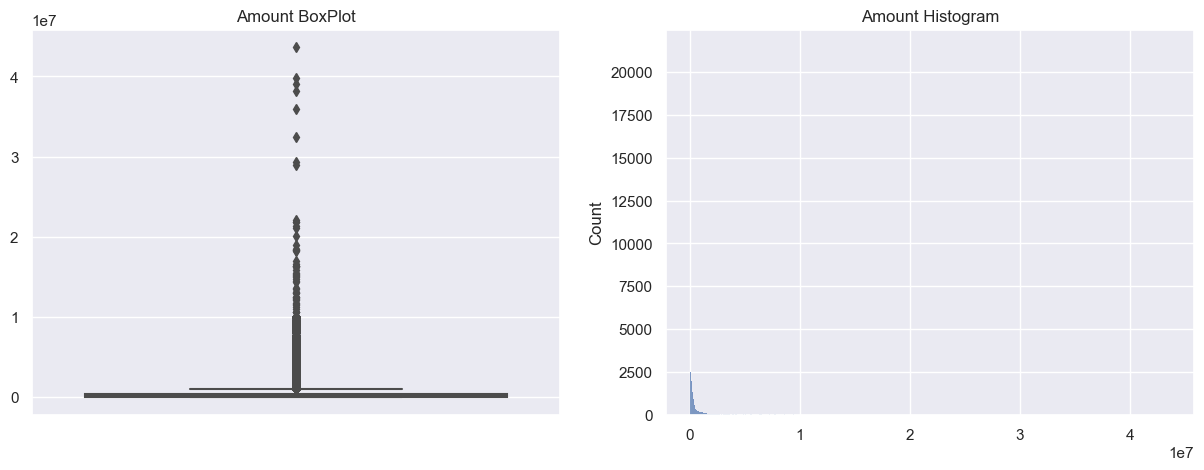

Kurtosis: 54.01287643391305
Skewness: 5.66714473846012


In [24]:
# Noisiness and type of noise
fig,axs = plt.subplots(1,2,figsize=(15,5))
sns.boxplot(y=amount.values,ax=axs[0])
sns.histplot(amount.values,ax=axs[1])
axs[0].set_title("Amount BoxPlot")
axs[1].set_title("Amount Histogram")

plt.savefig("../visualizations/exploration/transaction_amount.png", dpi=300, bbox_inches='tight')
plt.show()

# Kurtosis & Skewness
print("Kurtosis:",amount.kurtosis())
print("Skewness:",amount.skew())

In [25]:
1/.964533e+05

1.0367711628321685e-05

We see that:
- Distribution follows **Exp~(1e-5)**
- Distribution is **leptokurtic**,with fatter tails and extreme outliers.
- Distribution is **skewered to right** so outliers are too more in the right side.

In [26]:
Q1 = amount.quantile(0.25)
Q3 = amount.quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5*IQR
upper_bound = Q3 + 1.5*IQR
print(f"IQR: {IQR}\nUpper Bound: {upper_bound}\nLower Bound: {lower_bound}")

IQR: 386156.285
Upper Bound: 978230.6625
Lower Bound: -566394.4775


In [27]:
# Outlier detection Using IQR
iqr_outliers = amount[(amount > upper_bound) |  (amount < lower_bound)]
print("Number of IQR Outliers: ",iqr_outliers.count())
print("IQR Outliers: ",iqr_outliers.index)

Number of IQR Outliers:  9943
IQR Outliers:  Index([    5,    11,    13,    18,    28,    31,    36,    38,    43,    50,
       ...
       75557, 75569, 75571, 75578, 75581, 75585, 75593, 75596, 75597, 75599],
      dtype='int64', length=9943)


In [28]:
# Outlier detection Using ZScore
from scipy.stats import zscore
zscores = zscore(amount)
zscore_outliers = amount[zscores.abs() > 3]
print("Number of ZScore Outliers: ",zscore_outliers.count())
print("ZScore Outliers: ",zscore_outliers.index)

Number of ZScore Outliers:  2030
ZScore Outliers:  Index([    5,    36,    43,   150,   213,   254,   280,   303,   308,   321,
       ...
       75155, 75213, 75242, 75248, 75304, 75531, 75534, 75553, 75569, 75571],
      dtype='int64', length=2030)


In [29]:
# Check Shared Outliers Between the Two Methods
outliers = []
for index in iqr_outliers.index:
    if index in zscore_outliers.index:
        outliers.append(index)
print("Number of Shared Outliers: ",zscore_outliers.count())
print("Shared Outliers: ",outliers[:10],"...")

Number of Shared Outliers:  2030
Shared Outliers:  [5, 36, 43, 150, 213, 254, 280, 303, 308, 321] ...


We will remove shared outliers and some of outliers from iqr.

In [30]:
# Remove Shared Outliers
data = data[~data.index.isin(outliers)]

In [31]:
# Remove Some IQR Outliers
data = data[~data.index.isin(np.random.choice(iqr_outliers,size=500))]

In [32]:
# Usefulness for the task
print("Correlation Cofficient: ",round(data.isFraud.corr(amount)*100,2),"%")

Correlation Cofficient:  37.76 %


The variables are dependent, with 38% relationship between them.<br>
So **Ammount** has a middle impact on the target.

### Sender Balance

In [33]:
senderbalance = data.Amount
# Data Type
print("Data Type:",senderbalance.dtype,", Positive.")

Data Type: float64 , Positive.


In [34]:
senderbalance.describe()

count    7.353000e+04
mean     3.759366e+05
std      7.148400e+05
min      0.000000e+00
25%      1.195179e+04
50%      1.158812e+05
75%      3.580258e+05
max      5.274774e+06
Name: Amount, dtype: float64

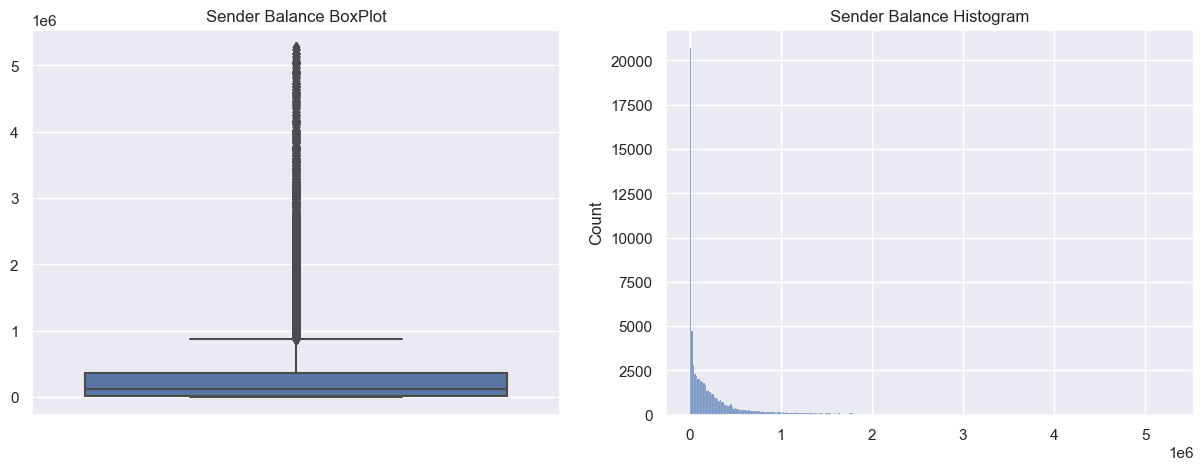

Kurtosis: 13.878685581119923
Skewness: 3.454380842897154


In [42]:
# Noisiness and type of noise
fig,axs = plt.subplots(1,2,figsize=(15,5))
sns.boxplot(y=senderbalance.values,ax=axs[0])
sns.histplot(senderbalance.values,ax=axs[1])
axs[0].set_title("Sender Balance BoxPlot")
axs[1].set_title("Sender Balance Histogram")

plt.savefig("../visualizations/exploration/sender_balance.png", dpi=300, bbox_inches='tight')
plt.show()

# Kurtosis & Skewness
print("Kurtosis:",senderbalance.kurtosis())
print("Skewness:",senderbalance.skew())

We see that:
- Distribution follows **Exp~(2.66e-6)**
- Distribution is **leptokurtic**,with fatter tails and extreme outliers.
- Distribution is **skewered to right** so outliers are more in the right side.

In [36]:
Q1 = senderbalance.quantile(0.25)
Q3 = senderbalance.quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5*IQR
upper_bound = Q3 + 1.5*IQR
print(f"IQR: {IQR}\nUpper Bound: {upper_bound}\nLower Bound: {lower_bound}")

IQR: 346074.0075
Upper Bound: 877136.80875
Lower Bound: -507159.22125


In [37]:
# Outlier detection Using IQR
iqr_outliers = senderbalance[(senderbalance > upper_bound) |  (senderbalance < lower_bound)]
print("Number of IQR Outliers: ",iqr_outliers.count())
print("IQR Outliers: ",iqr_outliers.index)

Number of IQR Outliers:  8810
IQR Outliers:  Index([   11,    13,    18,    28,    31,    38,    50,    54,    57,    69,
       ...
       75518, 75532, 75557, 75578, 75581, 75585, 75593, 75596, 75597, 75599],
      dtype='int64', length=8810)


In [38]:
# Outlier detection Using ZScore
from scipy.stats import zscore
zscores = zscore(senderbalance)
zscore_outliers = senderbalance[zscores.abs() > 3]
print("Number of ZScore Outliers: ",zscore_outliers.count())
print("ZScore Outliers: ",zscore_outliers.index)

Number of ZScore Outliers:  2142
ZScore Outliers:  Index([   18,    38,    57,    69,   242,   258,   292,   295,   298,   338,
       ...
       75246, 75288, 75293, 75320, 75375, 75396, 75400, 75487, 75492, 75496],
      dtype='int64', length=2142)


In [39]:
# Check Shared Outliers Between the Two Methods
outliers = []
for index in iqr_outliers.index:
    if index in zscore_outliers.index:
        outliers.append(index)
print("Number of Shared Outliers: ",zscore_outliers.count())
print("Shared Outliers: ",outliers[:10],"...")

Number of Shared Outliers:  2142
Shared Outliers:  [18, 38, 57, 69, 242, 258, 292, 295, 298, 338] ...


We will remove shared outliers.

In [40]:
# Remove Shared Outliers
data = data[~data.index.isin(outliers)]

In [41]:
# Usefulness for the task
print("Correlation Cofficient: ",round(data.isFraud.corr(senderbalance)*100,2),"%")

Correlation Cofficient:  35.35 %


The variables are dependent, with 25% relationship between them.<br>
So **Sender Balance** has a middle impact on the target.

### Receiver Balance

In [43]:
receiverbalance = data.ReceiverBalance
# Data Type
print("Data Type:",receiverbalance.dtype,", Positive.")

Data Type: float64 , Positive.


In [44]:
receiverbalance.describe()

count    7.138800e+04
mean     1.147890e+06
std      3.775298e+06
min      0.000000e+00
25%      0.000000e+00
50%      1.665038e+05
75%      1.006442e+06
max      2.551680e+08
Name: ReceiverBalance, dtype: float64

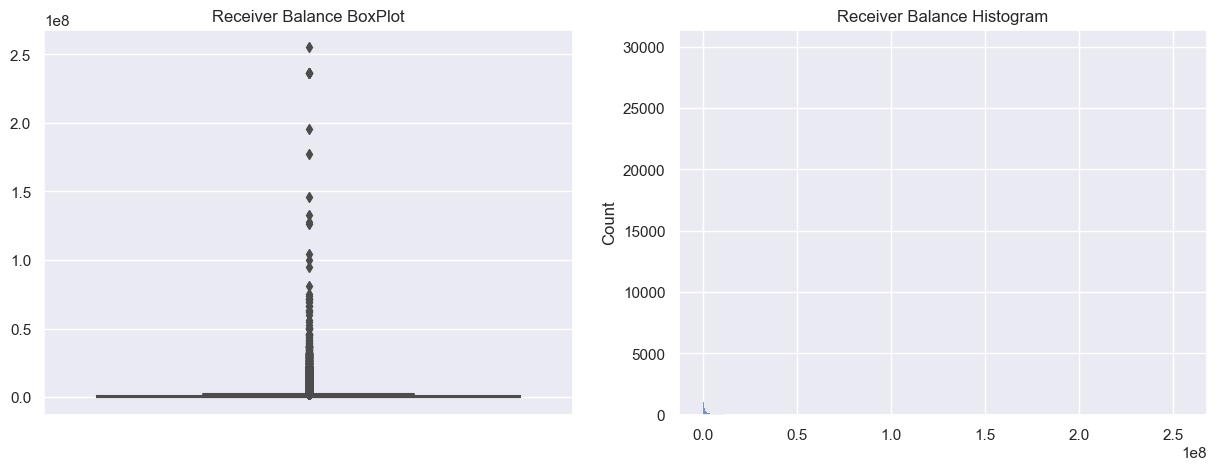

Kurtosis: 1433.0479657618125
Skewness: 27.537043798921093


In [46]:
# Noisiness and type of noise
fig,axs = plt.subplots(1,2,figsize=(15,5))
sns.boxplot(y=receiverbalance.values,ax=axs[0])
sns.histplot(receiverbalance.values,ax=axs[1])
axs[0].set_title("Receiver Balance BoxPlot")
axs[1].set_title("Receiver Balance Histogram")

plt.savefig("../visualizations/exploration/receiver_balance.png", dpi=300, bbox_inches='tight')
plt.show()

# Kurtosis & Skewness
print("Kurtosis:",receiverbalance.kurtosis())
print("Skewness:",receiverbalance.skew())

We see that:
- Distribution follows **Exp~(8.7e-7)**
- Distribution is **leptokurtic**,with fatter tails and extreme outliers.
- Distribution is **skewered to right** so outliers are more in the right side.

In [47]:
Q1 = receiverbalance.quantile(0.25)
Q3 = receiverbalance.quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5*IQR
upper_bound = Q3 + 1.5*IQR
print(f"IQR: {IQR}\nUpper Bound: {upper_bound}\nLower Bound: {lower_bound}")

IQR: 1006442.23
Upper Bound: 2516105.575
Lower Bound: -1509663.345


In [48]:
# Outlier detection Using IQR
iqr_outliers = receiverbalance[(receiverbalance > upper_bound) |  (receiverbalance < lower_bound)]
print("Number of IQR Outliers: ",iqr_outliers.count())
print("IQR Outliers: ",iqr_outliers.index)

Number of IQR Outliers:  8602
IQR Outliers:  Index([    9,    12,    23,    28,    34,    35,    41,    80,    93,   101,
       ...
       75532, 75535, 75539, 75540, 75541, 75547, 75552, 75557, 75578, 75585],
      dtype='int64', length=8602)


In [49]:
# Outlier detection Using ZScore
from scipy.stats import zscore
zscores = zscore(receiverbalance)
zscore_outliers = receiverbalance[zscores.abs() > 3]
print("Number of ZScore Outliers: ",zscore_outliers.count())
print("ZScore Outliers: ",zscore_outliers.index)

Number of ZScore Outliers:  721
ZScore Outliers:  Index([  123,   196,   373,   396,   404,   559,   745,   792,   888,  1295,
       ...
       74155, 74287, 74301, 74635, 74699, 74787, 74925, 74931, 74986, 75066],
      dtype='int64', length=721)


In [50]:
# Check Shared Outliers Between the Two Methods
outliers = []
for index in iqr_outliers.index:
    if index in zscore_outliers.index:
        outliers.append(index)
print("Number of Shared Outliers: ",zscore_outliers.count())
print("Shared Outliers: ",outliers[:10],"...")

Number of Shared Outliers:  721
Shared Outliers:  [123, 196, 373, 396, 404, 559, 745, 792, 888, 1295] ...


We will remove shared outliers

In [51]:
# Remove Shared Outliers
data = data[~data.index.isin(outliers)]

In [52]:
# Usefulness for the task
print("Correlation Cofficient: ",round(data.isFraud.corr(senderbalance)*100,2),"%")

Correlation Cofficient:  35.54 %


The variables are dependent, with 26% relationship between them.<br>
So **Receiver Balance** has a small impact on the target.

### Is Fraud

In [53]:
isfraud = data.isFraud
# Data Type
print("Data Type:",isfraud.dtype,", Binary.")

Data Type: int64 , Binary.


In [54]:
isfraud.describe()

count    70667.000000
mean         0.253555
std          0.435049
min          0.000000
25%          0.000000
50%          0.000000
75%          1.000000
max          1.000000
Name: isFraud, dtype: float64

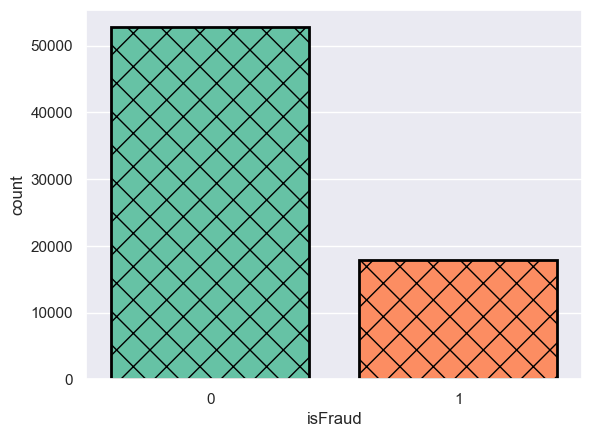

In [55]:
sns.countplot(x=isfraud,palette="Set2",saturation=1,lw=2,ec="black",hatch="X")

plt.savefig("../visualizations/exploration/isFraud.png", dpi=300, bbox_inches='tight')
plt.show()

We see that:
- Distribution follows **Bern~(0.25)**

## Bivariate Analysis

### **Type** with **Monthly Hour**

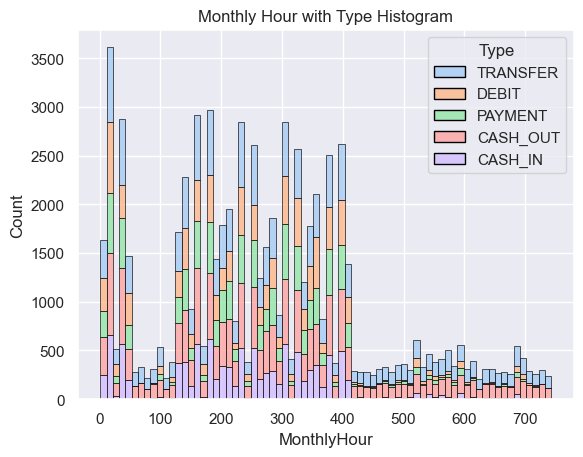

In [56]:
sns.histplot(data=data,x="MonthlyHour",hue="Type",palette="pastel",multiple="stack",edgecolor="black")
plt.title("Monthly Hour with Type Histogram")

plt.savefig("../visualizations/exploration/typeXmonthly_hour.png", dpi=300, bbox_inches='tight')
plt.show()

In [57]:
print(f"Correlation Coefficient: {monthly_hour.corr(data.Type.map(dict(zip(data.Type.unique(),range(0,5))))):.2%}")

Correlation Coefficient: -5.28%


There is nearly smalll correlation between **Type** and **Monthly Hour**.

### **Amount** with **Monthly Hour**

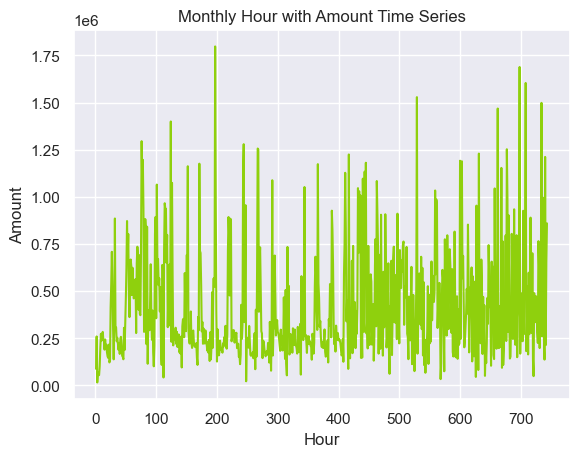

In [58]:
sns.lineplot(data=data.groupby("MonthlyHour",group_keys=False)[['Amount']].mean(),x="MonthlyHour",y="Amount",color="#8fd00d")
plt.title("Monthly Hour with Amount Time Series")
plt.xlabel("Hour")

plt.savefig("../visualizations/exploration/amountXmonthly_hour.png", dpi=300, bbox_inches='tight')
plt.show()

We see that transaction **Amount** is bigger at the start and end of the month.

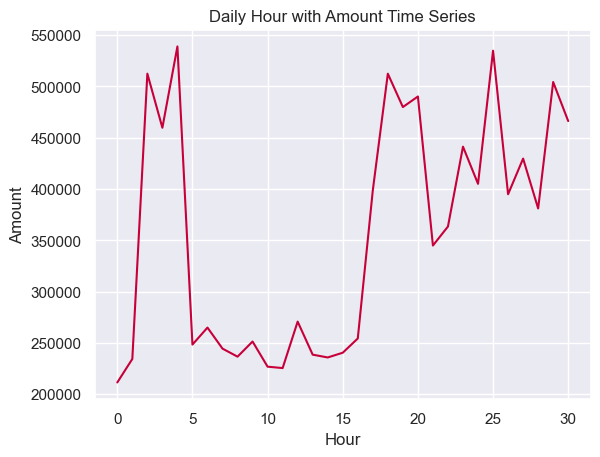

In [59]:
sns.lineplot(data=data.groupby((data['MonthlyHour'] // 24),group_keys=False)[['Amount']].mean(),x="MonthlyHour",y="Amount",color="#C70039")
plt.title("Daily Hour with Amount Time Series")
plt.xlabel("Hour")

plt.savefig("../visualizations/exploration/amountXdaily_hour.png", dpi=300, bbox_inches='tight')
plt.show()

We see that **Amount** of transactions is maximum at night while at day are too less.

In [60]:
print(f"Correlation Coefficient: {monthly_hour.corr(amount):.2%}")

Correlation Coefficient: 14.27%


There is small correlation between **Amount** and **Monthly Hour**.

### **Type** with **Amount**

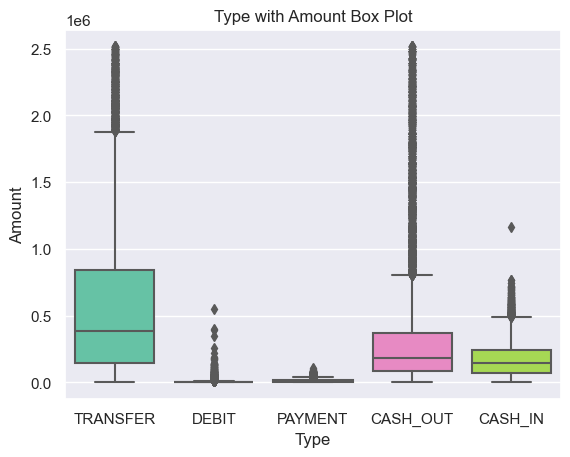

In [62]:
sns.boxplot(x='Type', y='Amount', data=data,palette="Set2",saturation=1)
plt.title('Type with Amount Box Plot')

plt.savefig("../visualizations/exploration/typeXamount.png", dpi=300, bbox_inches='tight')
plt.show()

We see that **Ammount** of transation is related to the its **type** for example when transaction is TRANSFER the amount is higher, not like DEBIT.

In [63]:
print(f"Correlation Coefficient: {amount.corr(data.Type.map(dict(zip(data.Type.unique(),range(0,5))))):.2%}")

Correlation Coefficient: -21.01%


There is -21% correlation between **Amount** and **Type**.

### **Sender Balance** with **Amount**

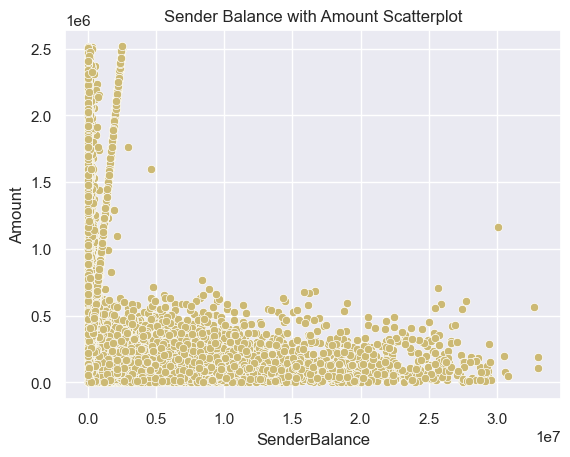

In [64]:
sns.scatterplot(data=data,x="SenderBalance",y="Amount",color=sns.color_palette(n_colors=20)[-2])
plt.title("Sender Balance with Amount Scatterplot")

plt.savefig("../visualizations/exploration/sender_balanceXamount.png", dpi=300, bbox_inches='tight')
plt.show()

We see that Higher **Balance of the Sender** doesnt always imply Higher **Amount** of transation.

In [65]:
print(f"Correlation Coefficient: {amount.corr(senderbalance):.2%}")

Correlation Coefficient: 100.00%


There is **perfect positive linear** correlation between Balance of Sender and Amount of the transaction. 

### **Receiver Balance** with **Amount**

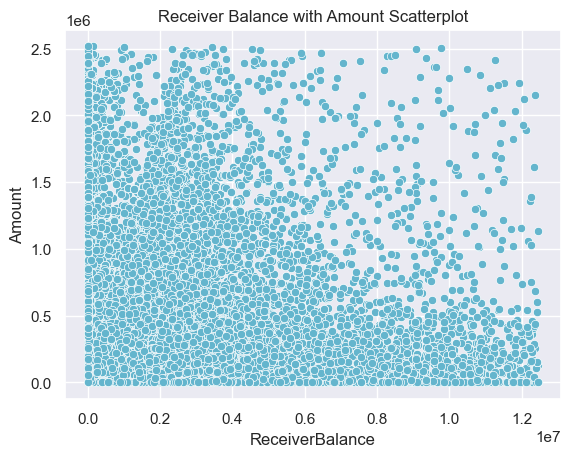

In [66]:
sns.scatterplot(data=data,x="ReceiverBalance",y="Amount",color=sns.color_palette(n_colors=20)[-1])
plt.title("Receiver Balance with Amount Scatterplot")

plt.savefig("../visualizations/exploration/receiver_balanceXamount.png", dpi=300, bbox_inches='tight')
plt.show()

In [67]:
print(f"Correlation Coefficient: {amount.corr(receiverbalance):.2%}")

Correlation Coefficient: 5.75%


There is smalll correlation between **Balance of Receiver** and the **Amount of the transaction**. 

### **Sender Balance** with **Receiver Balance**

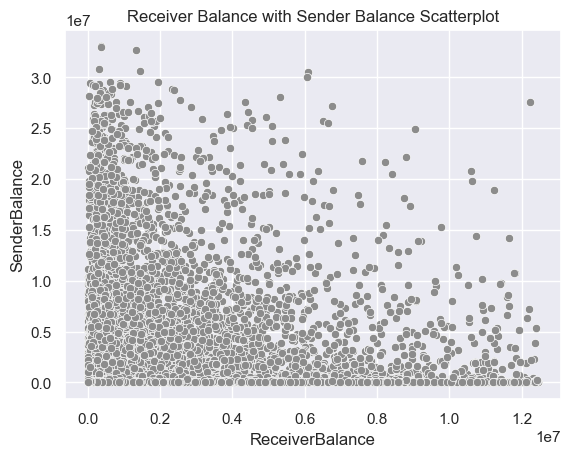

In [68]:
sns.scatterplot(data=data,x="ReceiverBalance",y="SenderBalance",color=sns.color_palette(n_colors=20)[-3])
plt.title("Receiver Balance with Sender Balance Scatterplot")

plt.savefig("../visualizations/exploration/sender_balanceXamount.png", dpi=300, bbox_inches='tight')
plt.show()

In [69]:
print(f"Correlation Coefficient: {senderbalance.corr(receiverbalance):.2%}")

Correlation Coefficient: 5.75%


Nearly same correlation as **ReceiverBalance** with **Amount** cause **Amount** and **SenderBalance** are highely correlation.

## Multivariate Analysis

### Features Interactions and Distributions

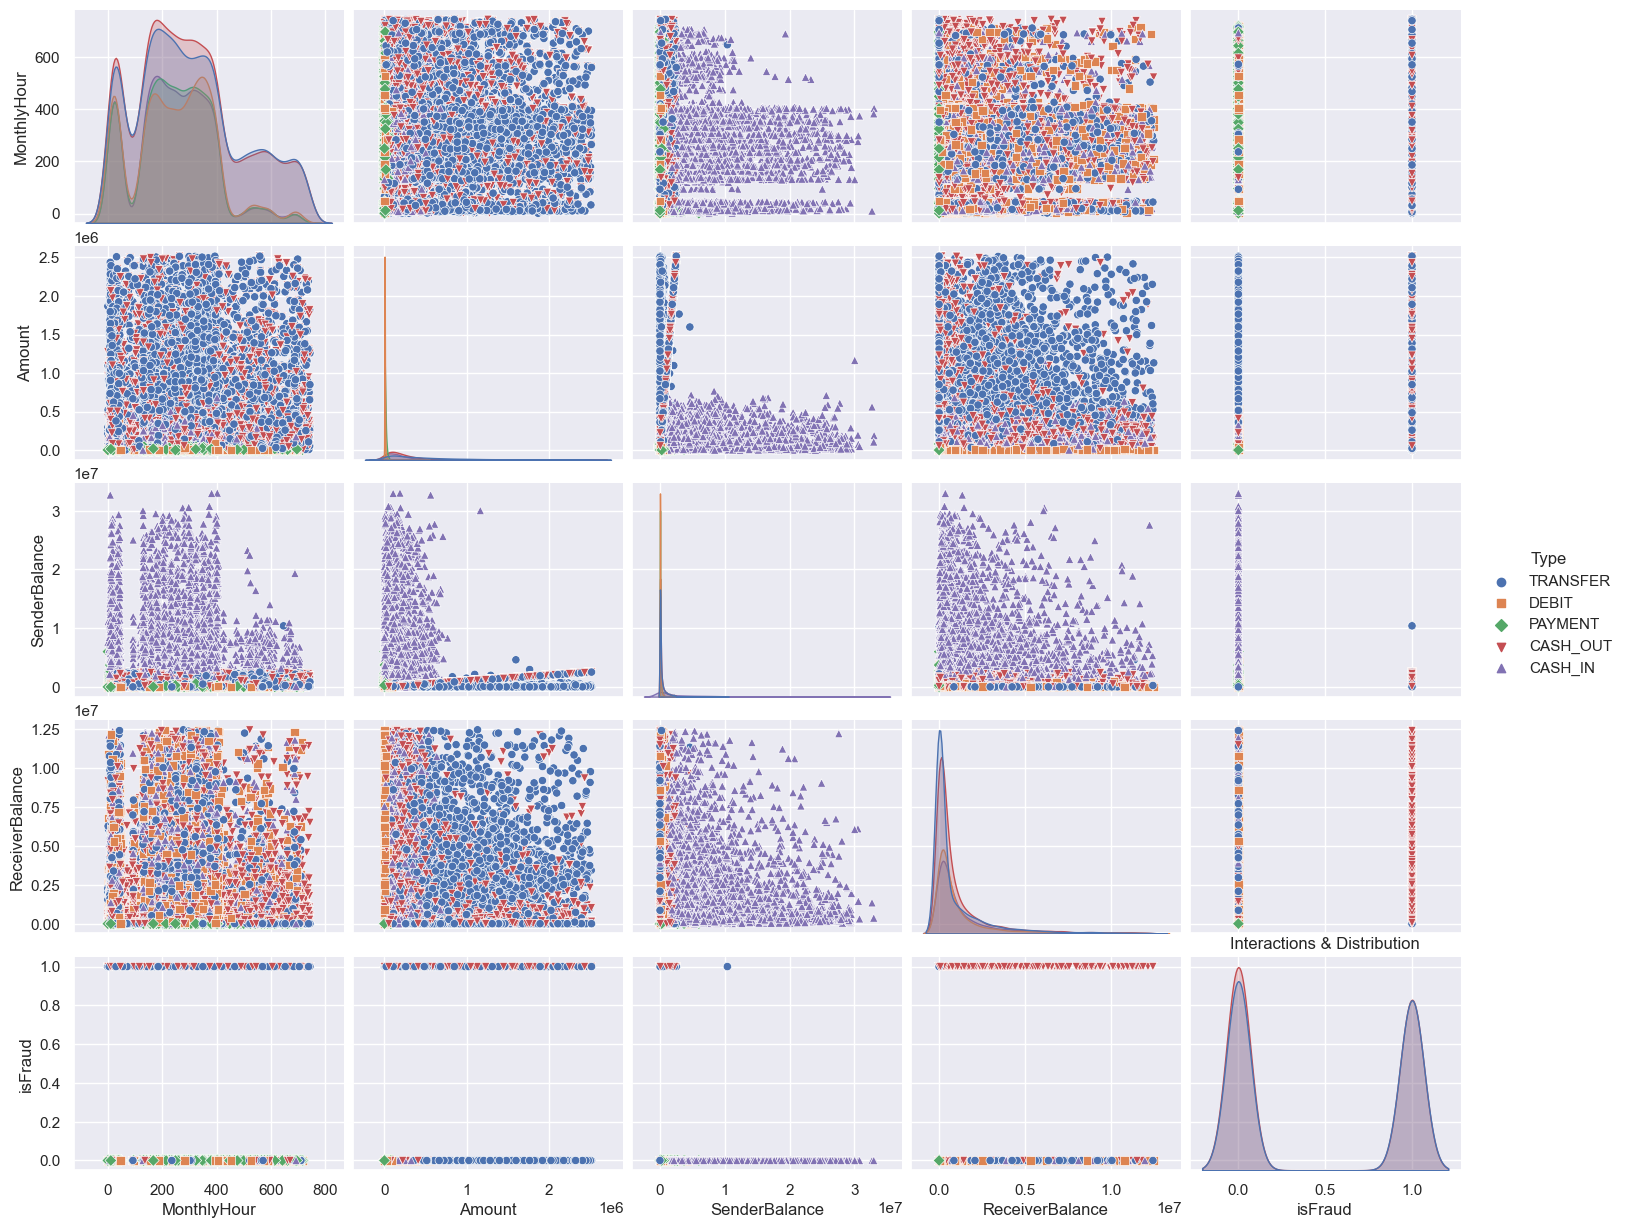

In [70]:
sns.pairplot(data=data,
    hue="Type",kind="scatter", 
    height=2.5, 
    aspect=1.2, 
    markers=["o", "s", "D", "v", "^"], 
    diag_kind="kde"
)
plt.title("Interactions & Distribution")

plt.savefig("../visualizations/exploration/features_interactions.png", dpi=300, bbox_inches='tight')
plt.show()

### Features Correlation

In [71]:
corrs = data.select_dtypes(include=np.number).corr()

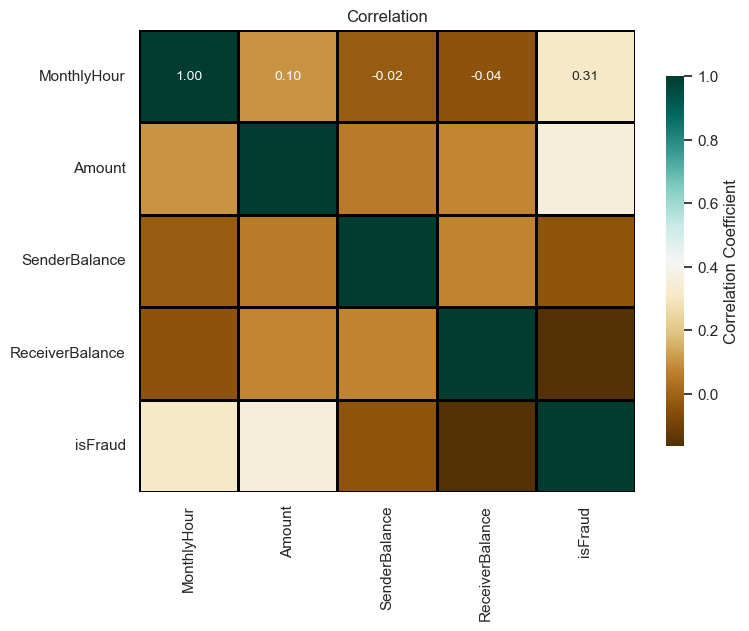

In [72]:
plt.figure(figsize=(8, 6))  
sns.heatmap(data=corrs,cmap="BrBG",annot=True,fmt=".2f",linewidths=2,linecolor="black",annot_kws={"size": 10},cbar_kws={"shrink": 0.8, "label": "Correlation Coefficient"})
plt.title("Correlation")

plt.savefig("../visualizations/exploration/features_correlation.png", dpi=300, bbox_inches='tight')
plt.show()

# 04 Data Processing

In [9]:
import numpy as np
import pandas as pd

from joblib import dump

## Load Data

In [2]:
train_data = pd.read_csv("../data/train_data.csv")
train_data.head()

,MonthlyHour,Type,Amount,SenderBalance,ReceiverBalance,isFraud
0,18,TRANSFER,185179.51,0.00,666160.16,0
1,185,DEBIT,18996.03,534.00,218943.42,0
2,306,PAYMENT,1249.91,101240.78,0.00,0
3,227,CASH_OUT,80870.17,0.00,98974.08,0
4,34,CASH_OUT,30917.39,30917.39,339926.42,1


In [3]:
X,y = train_data.drop("isFraud",axis=1),train_data.isFraud

## Clean Data

Data is already cleaned, but **Cleaning Pipeline** is necessary. 

In [4]:
from sklearn.impute import SimpleImputer

In [5]:
# Fill Monthly Hour and Type with Mode
mode_imputer = SimpleImputer(strategy="most_frequent")
#mode_imputer.fit(X[["MonthlyHour","Type"]].values.reshape((-1,1)))

In [6]:
# Fill Amount, Sender Balance and Receiver Balance with Mean
money_imputer = SimpleImputer(strategy="mean")
#money_imputer.fit(X[["Amount","SenderBalance","ReceiverBalance"]])

## Feature Engineering

In [36]:
from sklearn.base import BaseEstimator, TransformerMixin

class FeatureEngineeringTransformer(BaseEstimator, TransformerMixin):
    def __init__(self):
        pass

    def fit(self, X, y=None):
        return self

    def transform(self, X):
        eps = 1e-8
        #if X.__class__.__name__ == "DataFrame":
        
        #    data = X.copy()
        #else:
        data = pd.DataFrame(X)
        data.columns = ['MonthlyHour', 'Type', 'Amount', 'SenderBalance', 'ReceiverBalance']
        
        data['Hour'] = data['MonthlyHour'] % 24
        data['Day'] = (data['MonthlyHour'] // 24) % 30
        data['InWeekend'] = data['Day'].isin([5, 6, 12, 13, 19, 20, 26, 27])
        data['AmountCategory'] = pd.cut(data['Amount'], bins=[-1, 100, 1000, 10_000, 100_000, np.inf], labels=['Small', 'Medium', 'Large', 'Very Large', 'Extreme Large'])
        data['IsHighAmount'] = data['Amount'] > data['Amount'].quantile(0.99)
        data['BalanceDiff'] = data['SenderBalance'] - data['ReceiverBalance']
        
        return data

feature_engineering = FeatureEngineeringTransformer()
dump(feature_engineering,"../pipelines/feature_engineering.joblib")
X_engineered = feature_engineering.transform(X)

In [37]:
X_engineered.head()

,MonthlyHour,Type,Amount,SenderBalance,ReceiverBalance,Hour,Day,InWeekend,AmountCategory,IsHighAmount,BalanceDiff
0,18,TRANSFER,185179.51,0.00,666160.16,18,0,False,Extreme Large,False,-666160.16
1,185,DEBIT,18996.03,534.00,218943.42,17,7,False,Very Large,False,-218409.42
2,306,PAYMENT,1249.91,101240.78,0.00,18,12,True,Large,False,101240.78
3,227,CASH_OUT,80870.17,0.00,98974.08,11,9,False,Very Large,False,-98974.08
4,34,CASH_OUT,30917.39,30917.39,339926.42,10,1,False,Very Large,False,-309009.03


## Feature Scaling

In [12]:
from sklearn.preprocessing import StandardScaler

In [13]:
scaler = StandardScaler()
#scaler.fit(X_engineered.select_dtypes(np.number))

## Transform Categorical Features

In [14]:
from sklearn.preprocessing import OneHotEncoder,OrdinalEncoder

In [15]:
one_hot_enc = OneHotEncoder()
#one_hot_enc.fit(X_engineered["Type"].values.reshape((-1,1)))

In [16]:
custom_categories = [
    [False, True],  # For InWeekend
    [False, True],  # For IsHighAmount
    ['Small', 'Medium', 'Large', 'Very Large', 'Extreme Large']  # For AmountCategory
]
ord_enc = OrdinalEncoder(categories=custom_categories)
#ord_enc.fit(X_engineered[["InWeekend","IsHighAmount","AmountCategory"]])

## Build Full Pipeline

In [17]:
import cloudpickle

from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import FunctionTransformer

In [19]:
cleaning_pipeline = ColumnTransformer(
    transformers=[
        ("mode_imputing", mode_imputer, ["MonthlyHour", "Type"]),
        ("mean_imputing", money_imputer, ["Amount", "SenderBalance", "ReceiverBalance"]),
    ],
    remainder="passthrough"
)
dump(cleaning_pipeline, '../pipelines/cleaning_pipeline.joblib')

cleaning_pipeline

ColumnTransformer(remainder='passthrough',
                  transformers=[('mode_imputing',
                                 SimpleImputer(strategy='most_frequent'),
                                 ['MonthlyHour', 'Type']),
                                ('mean_imputing', SimpleImputer(),
                                 ['Amount', 'SenderBalance',
                                  'ReceiverBalance'])])

In [20]:
cleaning_pipeline.fit_transform(X)

array([[18, 'TRANSFER', 185179.51, 0.0, 666160.16],
       [185, 'DEBIT', 18996.03, 534.0, 218943.42],
       [306, 'PAYMENT', 1249.91, 101240.78, 0.0],
       ...,
       [490, 'CASH_OUT', 1048388.34, 1048388.34, 0.0],
       [281, 'CASH_OUT', 54235.7, 54235.7, 0.0],
       [605, 'CASH_OUT', 1555182.41, 1555182.41, 76405.76]], dtype=object)

In [21]:
categorical_transforming_pipeline = ColumnTransformer(
    transformers=[
        ("one_hot_enc",one_hot_enc,["Type"]),
        ("ordinal_enc",ord_enc,["InWeekend","IsHighAmount","AmountCategory"])
    ],
    remainder="passthrough"
)
dump(categorical_transforming_pipeline,"../pipelines/categorical_transforming_pipeline.joblib")
categorical_transforming_pipeline

ColumnTransformer(remainder='passthrough',
                  transformers=[('one_hot_enc', OneHotEncoder(), ['Type']),
                                ('ordinal_enc',
                                 OrdinalEncoder(categories=[[False, True],
                                                            [False, True],
                                                            ['Small', 'Medium',
                                                             'Large',
                                                             'Very Large',
                                                             'Extreme Large']]),
                                 ['InWeekend', 'IsHighAmount',
                                  'AmountCategory'])])

In [24]:
transforming_pipeline = ColumnTransformer(
    transformers=[
        ("scaling",scaler,["MonthlyHour","Amount", "SenderBalance", "ReceiverBalance","Hour","Day","BalanceDiff"]),
        ("encoding",categorical_transforming_pipeline,["Type","InWeekend","AmountCategory","IsHighAmount"])
    ],
    remainder="passthrough"
)
dump(transforming_pipeline,"../pipelines/transforming_pipeline.joblib")
transforming_pipeline

ColumnTransformer(remainder='passthrough',
                  transformers=[('scaling', StandardScaler(),
                                 ['MonthlyHour', 'Amount', 'SenderBalance',
                                  'ReceiverBalance', 'Hour', 'Day',
                                  'BalanceDiff']),
                                ('encoding',
                                 ColumnTransformer(remainder='passthrough',
                                                   transformers=[('one_hot_enc',
                                                                  OneHotEncoder(),
                                                                  ['Type']),
                                                                 ('ordinal_enc',
                                                                  OrdinalEncoder(categories=[[False,
                                                                                              True],
                                                                                             [False,
                                                                                              True],
                                                                                             ['Small',
                                                                                              'Medium',
                                                                                              'Large',
                                                                                              'Very '
                                                                                              'Large',
                                                                                              'Extreme '
                                                                                              'Large']]),
                                                                  ['InWeekend',
                                                                   'IsHighAmount',
                                                                   'AmountCategory'])]),
                                 ['Type', 'InWeekend', 'AmountCategory',
                                  'IsHighAmount'])])

In [38]:
pipeline = Pipeline(
    steps=[
        ("cleaning",cleaning_pipeline),
        ("feature_engineering",feature_engineering),
        ("transforming",transforming_pipeline)
    ]
)
pipeline.fit_transform(X)

array([[-1.48141131, -0.26283129, -0.33551444, ...,  0.        ,
         0.        ,  4.        ],
       [-0.53610319, -0.36902581, -0.33533514, ...,  0.        ,
         0.        ,  3.        ],
       [ 0.14882066, -0.38036593, -0.30152035, ...,  1.        ,
         0.        ,  2.        ],
       ...,
       [ 1.19035776,  0.28877613,  0.01650785, ...,  1.        ,
         0.        ,  4.        ],
       [ 0.00730747, -0.34650697, -0.31730346, ...,  0.        ,
         0.        ,  3.        ],
       [ 1.84131844,  0.61262751,  0.18667648, ...,  0.        ,
         0.        ,  4.        ]])

In [39]:
with open("../pipelines/pipeline.pkl", "wb") as f:
    cloudpickle.dump(pipeline, f)

In [27]:
# Test Pipeline with Test Data
pipeline.transform(pd.read_csv("../data/test_data.csv")).shape

(8400, 15)

In [28]:
# Save Processed Training data
train_data_processed = pd.DataFrame(pipeline.transform(X))
train_data_processed["target"] = y
train_data_processed

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,target
0,-1.481411,-0.262831,-0.335514,-0.123297,0.683058,-1.492419,-0.094636,0.0,0.0,0.0,0.0,1.0,0.0,0.0,4.0,0
1,-0.536103,-0.369026,-0.335335,-0.230177,0.505376,-0.522977,-0.006963,0.0,0.0,1.0,0.0,0.0,0.0,0.0,3.0,0
2,0.148821,-0.380366,-0.301520,-0.282502,0.683058,0.169482,0.055627,0.0,0.0,0.0,1.0,0.0,1.0,0.0,2.0,0
3,-0.298361,-0.329487,-0.335514,-0.258848,-0.560711,-0.245993,0.016423,0.0,1.0,0.0,0.0,0.0,0.0,0.0,3.0,0
4,-1.390843,-0.361408,-0.325133,-0.201263,-0.738393,-1.353927,-0.024703,0.0,1.0,0.0,0.0,0.0,0.0,0.0,3.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
75595,-0.173829,-0.381017,-0.243724,-0.282502,-0.916074,-0.107501,0.089331,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0
75596,-0.247416,0.512344,-0.335514,0.215003,1.038420,-0.245993,-0.371810,0.0,0.0,0.0,0.0,1.0,0.0,0.0,4.0,0
75597,1.190358,0.288776,0.016508,-0.282502,-0.738393,1.277416,0.241084,0.0,1.0,0.0,0.0,0.0,1.0,0.0,4.0,1
75598,0.007307,-0.346507,-0.317303,-0.282502,0.505376,0.030990,0.046423,0.0,1.0,0.0,0.0,0.0,0.0,0.0,3.0,1


In [29]:
train_data_processed.to_csv("../data/train_processed_data.csv")

# 05 Build Models

In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns;sns.set()

In [11]:
import warnings
warnings.filterwarnings(action="ignore")

## Load Processed Data

In [12]:
train_data = pd.read_csv("../data/train_processed_data.csv")
train_data.drop("Unnamed: 0",axis=1,inplace=True)
train_data.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,target
0,-1.481411,-0.262831,-0.335514,-0.123297,0.683058,-1.492419,-0.094636,0.0,0.0,0.0,0.0,1.0,0.0,0.0,4.0,0
1,-0.536103,-0.369026,-0.335335,-0.230177,0.505376,-0.522977,-0.006963,0.0,0.0,1.0,0.0,0.0,0.0,0.0,3.0,0
2,0.148821,-0.380366,-0.301520,-0.282502,0.683058,0.169482,0.055627,0.0,0.0,0.0,1.0,0.0,1.0,0.0,2.0,0
3,-0.298361,-0.329487,-0.335514,-0.258848,-0.560711,-0.245993,0.016423,0.0,1.0,0.0,0.0,0.0,0.0,0.0,3.0,0
4,-1.390843,-0.361408,-0.325133,-0.201263,-0.738393,-1.353927,-0.024703,0.0,1.0,0.0,0.0,0.0,0.0,0.0,3.0,1


In [13]:
# Check Dimentions of Training Data
train_data.shape

(75600, 16)

Data is huge with 75600 records, so we will sample smaller training sets so we can train many different models in a reasonable time.e

In [14]:
train_subset = train_data.sample(15_000,random_state=42)

In [15]:
X,y = train_subset.drop("target",axis=1),train_subset['target']

## Shortlist Promising Models

In [24]:
from sklearn.model_selection import cross_val_score,cross_val_predict
from sklearn.metrics import ConfusionMatrixDisplay,precision_score,recall_score,f1_score,roc_auc_score

def validate_model(model,X,y,scoring="accuracy",cv=3):
    score = cross_val_score(estimator=model,X=X,y=y,scoring=scoring,cv=cv)
    print(f"{scoring.title()} Mean= {np.mean(score):.2%}")
    print(f"{scoring.title()} Std= {np.std(score):.2}")

    preds = cross_val_predict(estimator=model,X=X,y=y,cv=cv)
    # Confusion Matrix
    ConfusionMatrixDisplay.from_predictions(y_true=y,y_pred=preds)
    model_name = model.__class__.__name__
    plt.savefig(f"../visualizations/Build_Models/{model_name}.png", dpi=300, bbox_inches='tight')

    f1 = f1_score(y,preds)
    roc_auc = roc_auc_score(y,preds)
    # Precision, Recall ,ROC AUC and F1 Scores
    print(f"Precision= {precision_score(y,preds):.2%}")
    print(f"Recall= {recall_score(y,preds):.2%}")
    print(f"F1= {f1:.2%}")
    print(f"ROC AUC= {roc_auc:.2%}")
    return f1,roc_auc

### Logistic Regression

In [1]:
from sklearn.linear_model import LogisticRegression

In [22]:
log_reg = LogisticRegression()
log_reg.fit(X,y)

LogisticRegression()

Accuracy Mean= 89.09%
Accuracy Std= 0.0026
Precision= 85.26%
Recall= 74.50%
F1= 79.52%
ROC AUC= 84.69%


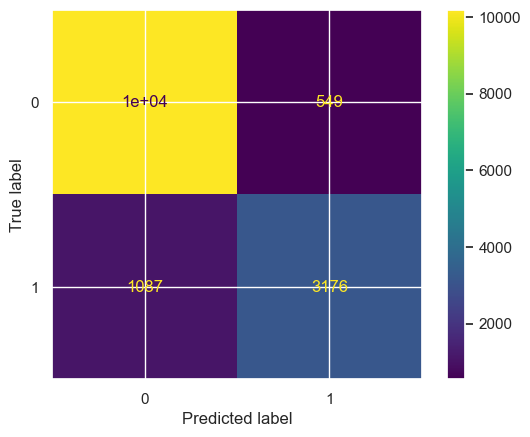

In [25]:
log_reg_f1,log_reg_roc_auc = validate_model(log_reg,X,y)

### Naive Bayes

In [26]:
from sklearn.naive_bayes import GaussianNB,BernoulliNB

In [27]:
gauss_nb = GaussianNB()
gauss_nb.fit(X,y)

GaussianNB()

Accuracy Mean= 71.61%
Accuracy Std= 0.0019
Precision= 50.02%
Recall= 99.93%
F1= 66.67%
ROC AUC= 80.15%


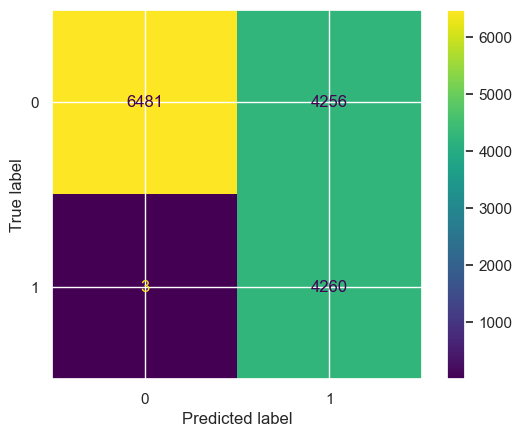

In [28]:
gauss_nb_f1,gauss_nb_roc_auc = validate_model(gauss_nb,X,y)

In [29]:
bern_nb = BernoulliNB()
bern_nb.fit(X,y)

BernoulliNB()

Accuracy Mean= 85.54%
Accuracy Std= 0.0042
Precision= 77.05%
Recall= 69.95%
F1= 73.33%
ROC AUC= 80.84%


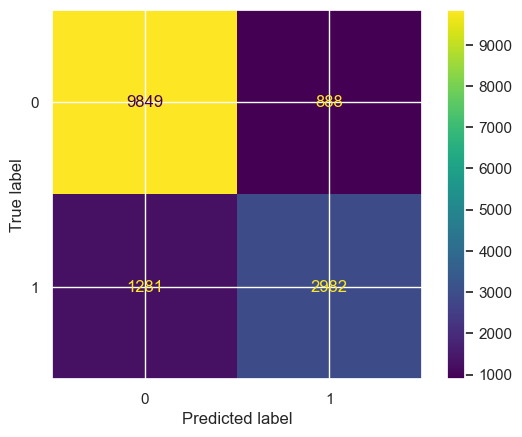

In [30]:
bern_nb_f1,bern_nb_roc_auc = validate_model(bern_nb,X,y)

### SVM

In [31]:
from sklearn.svm import LinearSVC

In [32]:
linr_svc = LinearSVC()
linr_svc.fit(X,y)

LinearSVC()

Accuracy Mean= 91.84%
Accuracy Std= 0.0031
Precision= 91.12%
Recall= 78.96%
F1= 84.60%
ROC AUC= 87.95%


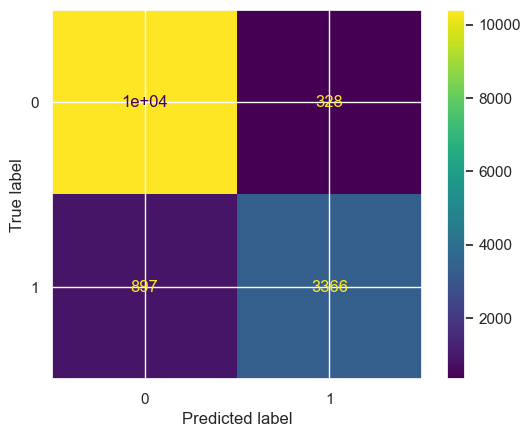

In [33]:
linr_svc_f1,linr_svc_roc_auc = validate_model(linr_svc,X,y)

### KNN

In [34]:
from sklearn.neighbors import KNeighborsClassifier

In [35]:
knn = KNeighborsClassifier()
knn.fit(X,y)

KNeighborsClassifier()

Accuracy Mean= 93.07%
Accuracy Std= 0.0028
Precision= 90.36%
Recall= 84.64%
F1= 87.40%
ROC AUC= 90.52%


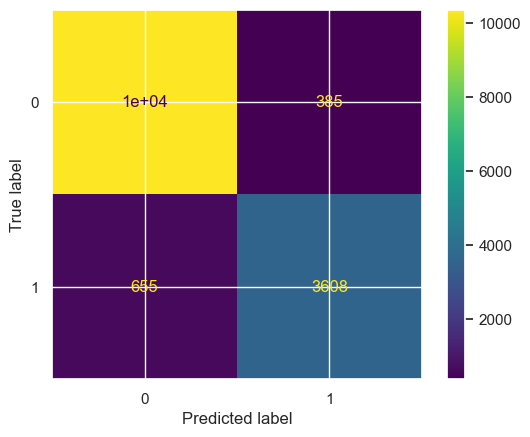

In [36]:
knn_f1,knn_roc_auc = validate_model(knn,X,y)

### Decision Tree

In [37]:
from sklearn.tree import DecisionTreeClassifier

In [38]:
tree_clf = DecisionTreeClassifier()
tree_clf.fit(X,y)

DecisionTreeClassifier()

Accuracy Mean= 97.70%
Accuracy Std= 0.0048
Precision= 95.19%
Recall= 96.93%
F1= 96.05%
ROC AUC= 97.49%


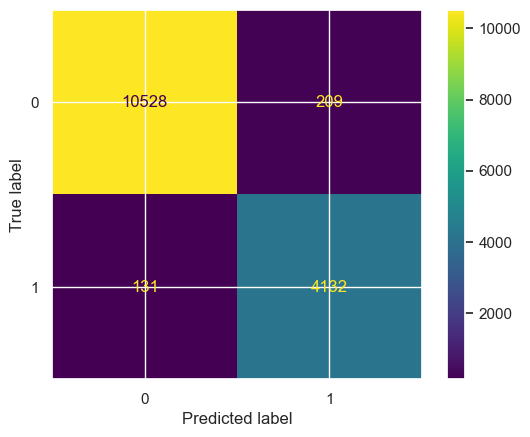

In [39]:
tree_f1,tree_roc_auc = validate_model(tree_clf,X,y)

### Random Forest

In [40]:
from sklearn.ensemble import RandomForestClassifier

In [41]:
forest_clf = RandomForestClassifier()
forest_clf.fit(X,y)

RandomForestClassifier()

Accuracy Mean= 98.30%
Accuracy Std= 0.001
Precision= 96.40%
Recall= 97.33%
F1= 96.86%
ROC AUC= 97.94%


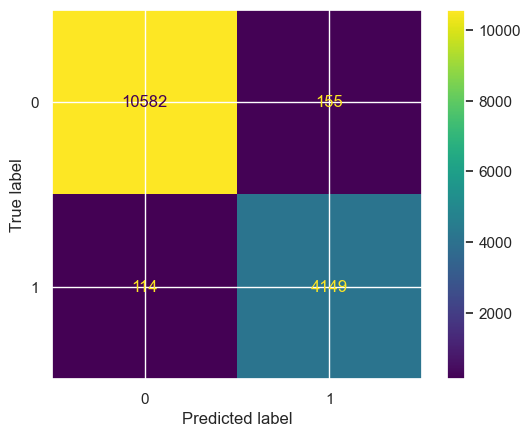

In [42]:
forest_f1,forest_roc_auc = validate_model(forest_clf,X,y)

### XGB

In [43]:
from xgboost import XGBClassifier

In [44]:
xgb_clf = XGBClassifier()
xgb_clf.fit(X,y)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

Accuracy Mean= 98.69%
Accuracy Std= 0.00098
Precision= 97.06%
Recall= 98.38%
F1= 97.72%
ROC AUC= 98.60%


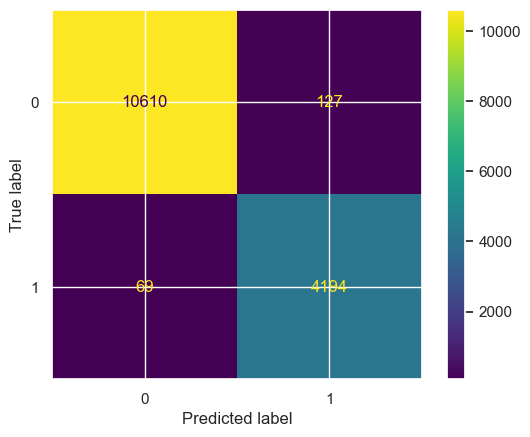

In [45]:
xgb_f1,xgb_roc_auc = validate_model(xgb_clf,X,y)

## Compare Models

In [46]:
results = [("Logistic Regression",log_reg_f1,log_reg_roc_auc),
("Gaussian NB",gauss_nb_f1,gauss_nb_roc_auc),
("Bernoulli NB",bern_nb_f1,bern_nb_roc_auc),
("Linear SVC",linr_svc_f1,linr_svc_roc_auc),
("KNN",knn_f1,knn_roc_auc),
("Decision Tree",tree_f1,tree_roc_auc),
("Random Forest",forest_f1,forest_roc_auc),
("XGB",xgb_f1,xgb_roc_auc)]
results = pd.DataFrame(results)
results.columns = ["Algorithm","F1","ROC_AUC"]
results

,Algorithm,F1,ROC_AUC
0,Logistic Regression,0.795193,0.846942
1,Gaussian NB,0.666719,0.801455
2,Bernoulli NB,0.733309,0.808401
3,Linear SVC,0.846048,0.879518
4,KNN,0.874031,0.905248
5,Decision Tree,0.960483,0.974903
6,Random Forest,0.968600,0.979411
7,XGB,0.977167,0.985993


In [47]:
results_melted = results.melt(id_vars=["Algorithm"], value_vars=["F1", "ROC_AUC"], 
                                    var_name="Metric", value_name="Score")
results_melted

,Algorithm,Metric,Score
0,Logistic Regression,F1,0.795193
1,Gaussian NB,F1,0.666719
2,Bernoulli NB,F1,0.733309
3,Linear SVC,F1,0.846048
4,KNN,F1,0.874031
5,Decision Tree,F1,0.960483
6,Random Forest,F1,0.968600
7,XGB,F1,0.977167
8,Logistic Regression,ROC_AUC,0.846942
9,Gaussian NB,ROC_AUC,0.801455


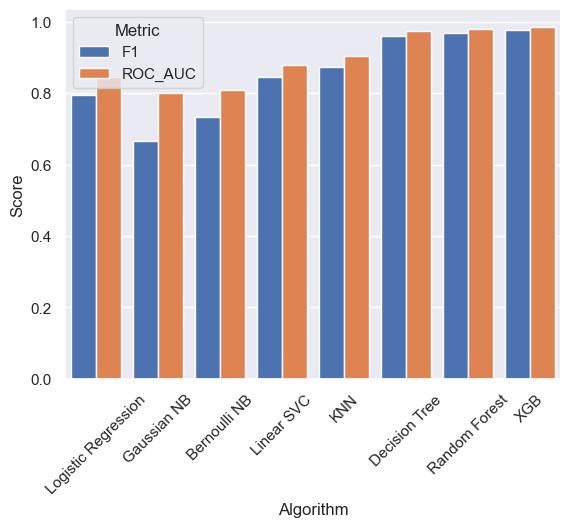

In [48]:
sns.barplot(data=results_melted,x="Algorithm",y="Score",hue="Metric",saturation=1)
plt.xticks(rotation=45)

plt.savefig(f"../visualizations/Build_Models/ModelsComparison.png", dpi=300, bbox_inches='tight')
plt.show()

We will choose best model they make different types of erros:
- SVC
- KNN
- Decision Tree
- XGB

## Store Best Models

In [176]:
# Save The Models
from joblib import dump

In [178]:
dump(linr_svc,"../models/svc.joblib")
dump(knn,"../models/knn.joblib")
dump(tree_clf,"../models/decision_tree.joblib")
dump(xgb_clf,"../models/xgb.joblib")

['../models/xgb.joblib']

# 06 Finetune Models

In [19]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from joblib import dump,load
import cloudpickle

In [17]:
import warnings
warnings.filterwarnings(action="ignore")

## Load Processed Data

In [9]:
train_data = pd.read_csv("../data/train_processed_data.csv")
train_data.drop(columns=["Unnamed: 0"],axis=1,inplace=True)
train_data

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,target
0,-1.481411,-0.262831,-0.335514,-0.123297,0.683058,-1.492419,-0.094636,0.0,0.0,0.0,0.0,1.0,0.0,0.0,4.0,0
1,-0.536103,-0.369026,-0.335335,-0.230177,0.505376,-0.522977,-0.006963,0.0,0.0,1.0,0.0,0.0,0.0,0.0,3.0,0
2,0.148821,-0.380366,-0.301520,-0.282502,0.683058,0.169482,0.055627,0.0,0.0,0.0,1.0,0.0,1.0,0.0,2.0,0
3,-0.298361,-0.329487,-0.335514,-0.258848,-0.560711,-0.245993,0.016423,0.0,1.0,0.0,0.0,0.0,0.0,0.0,3.0,0
4,-1.390843,-0.361408,-0.325133,-0.201263,-0.738393,-1.353927,-0.024703,0.0,1.0,0.0,0.0,0.0,0.0,0.0,3.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
75595,-0.173829,-0.381017,-0.243724,-0.282502,-0.916074,-0.107501,0.089331,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0
75596,-0.247416,0.512344,-0.335514,0.215003,1.038420,-0.245993,-0.371810,0.0,0.0,0.0,0.0,1.0,0.0,0.0,4.0,0
75597,1.190358,0.288776,0.016508,-0.282502,-0.738393,1.277416,0.241084,0.0,1.0,0.0,0.0,0.0,1.0,0.0,4.0,1
75598,0.007307,-0.346507,-0.317303,-0.282502,0.505376,0.030990,0.046423,0.0,1.0,0.0,0.0,0.0,0.0,0.0,3.0,1


In [10]:
X,y = train_data.drop("target",axis=1),train_data['target']

In [11]:
# Separate Data to Training/Validation
from sklearn.model_selection import train_test_split

X_train,X_valid,y_train,y_valid = train_test_split(X,y,test_size=0.1,random_state=42,stratify=y)

Some algorithms like SVM dont handle large data well, so we will use small subset of the data to finetune them.

In [12]:
X_subset = X_train.sample(10_000,random_state=42)
y_subset = y_train.loc[X_subset.index]

## Fine Tuning Base Models

In [7]:
from joblib import dump,load
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

### KNN

In [8]:
# Load the KNN
knn = load("../models/knn.joblib")
knn

KNeighborsClassifier()

In [23]:
param_grid = {
    "n_neighbors":[10,15,20,30],
    "metric":["euclidean","manhattan"],
    "weights":["uniform","distance"]
}

grid_search = GridSearchCV(knn,param_grid=param_grid,cv=3,scoring="f1")
grid_search.fit(X_subset,y_subset)

GridSearchCV(cv=3, estimator=KNeighborsClassifier(),
             param_grid={'metric': ['euclidean', 'manhattan'],
                         'n_neighbors': [10, 15, 20, 30],
                         'weights': ['uniform', 'distance']},
             scoring='f1')

In [24]:
grid_search.best_params_

{'metric': 'manhattan', 'n_neighbors': 10, 'weights': 'distance'}

- First Time: **{'metric': 'manhattan', 'n_neighbors': 10, 'weights': 'distance'}**<br>
We see that the best neighbors is 10 which is the max,so we will run other time with large neighbors choices.
- Second Time: **{'metric': 'manhattan', 'n_neighbors': 10, 'weights': 'distance'}**<br>
We see it stays at **10** which is best while its already overfitting.

In [33]:
# Performace on Training Set
grid_search.score(X_train,y_train)

0.9226343208148666

In [27]:
# Validate Performace on Validation Set
grid_search.score(X_valid,y_valid)

0.9073556797020483

In [28]:
best_knn = grid_search.best_estimator_

In [29]:
# Check CV Results
cv_res = pd.DataFrame(grid_search.cv_results_)
cv_res.sort_values(by="mean_test_score", ascending=False, inplace=True)
cv_res

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_metric,param_n_neighbors,param_weights,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score
9,0.017685,0.000499,0.199581,0.000528,manhattan,10,distance,"{'metric': 'manhattan', 'n_neighbors': 10, 'we...",0.888889,0.885281,0.897561,0.890577,0.005153,1
11,0.017680,0.000392,0.231951,0.000783,manhattan,15,distance,"{'metric': 'manhattan', 'n_neighbors': 15, 'we...",0.878771,0.887432,0.894079,0.886761,0.006267,2
13,0.018686,0.000397,0.269633,0.005259,manhattan,20,distance,"{'metric': 'manhattan', 'n_neighbors': 20, 'we...",0.874107,0.888158,0.886339,0.882868,0.006239,3
15,0.017628,0.000472,0.325916,0.009690,manhattan,30,distance,"{'metric': 'manhattan', 'n_neighbors': 30, 'we...",0.859688,0.882125,0.883288,0.875034,0.010861,4
1,0.018847,0.000876,0.220472,0.003588,euclidean,10,distance,"{'metric': 'euclidean', 'n_neighbors': 10, 'we...",0.862466,0.873713,0.883089,0.873089,0.008431,5
3,0.019663,0.002315,0.268933,0.007040,euclidean,15,distance,"{'metric': 'euclidean', 'n_neighbors': 15, 'we...",0.856669,0.867325,0.875000,0.866331,0.007517,6
5,0.018418,0.000910,0.302536,0.010730,euclidean,20,distance,"{'metric': 'euclidean', 'n_neighbors': 20, 'we...",0.853821,0.865672,0.872727,0.864073,0.007801,7
7,0.021042,0.004864,0.377251,0.049879,euclidean,30,distance,"{'metric': 'euclidean', 'n_neighbors': 30, 'we...",0.845465,0.860660,0.863938,0.856688,0.008048,8
10,0.018944,0.000828,0.427716,0.015190,manhattan,15,uniform,"{'metric': 'manhattan', 'n_neighbors': 15, 'we...",0.836735,0.853617,0.859218,0.849857,0.009556,9
8,0.017340,0.000536,0.383363,0.003117,manhattan,10,uniform,"{'metric': 'manhattan', 'n_neighbors': 10, 'we...",0.838453,0.851620,0.856332,0.848802,0.007566,10


In [52]:
# Fine Tune Best KNN on all the dataset
best_knn.fit(X_train,y_train)

KNeighborsClassifier(metric='manhattan', n_neighbors=10, weights='distance')

In [54]:
# Store Fine-Tuned KNN
dump(best_knn,"../models/finetuned/best_knn.joblib")

['../models/finetuned/best_knn.joblib']

### SVC

SVC is veryy sloww for large dataset so it will get fine tuned.

In [30]:
# Load the SVC
svc = load("../models/svc.joblib") # Cause Last one used were LinearSVC not SVC

In [32]:
svc.score(X_train,y_train)

0.9207231040564374

In [31]:
svc.score(X_valid,y_valid)

0.9235449735449736

### Decission Tree

In [36]:
# Load the Decision Tree
tree_clf = load("../models/decision_tree.joblib")

In [37]:
param_grid = {
    "criterion":["gini","entropy"],
    "max_depth":[2,5,10,15]
}
grid_search = GridSearchCV(tree_clf,param_grid=param_grid,cv=3,scoring="f1")
grid_search.fit(X_subset,y_subset)

GridSearchCV(cv=3, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [2, 5, 10, 15]},
             scoring='f1')

In [38]:
grid_search.best_params_

{'criterion': 'entropy', 'max_depth': 15}

In [39]:
# Performace on Training Set
grid_search.score(X_train,y_train)

0.9671469446147557

In [41]:
# Performace on Validatino Set
grid_search.score(X_valid,y_valid)

0.9674461256304449

In [44]:
best_tree = grid_search.best_estimator_

In [42]:
# Check CV Results
cv_res = pd.DataFrame(grid_search.cv_results_)
cv_res.sort_values(by="mean_test_score", ascending=False, inplace=True)
cv_res

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_criterion,param_max_depth,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score
7,0.060908,0.000748,0.004993,0.000017,entropy,15,"{'criterion': 'entropy', 'max_depth': 15}",0.958617,0.960744,0.955844,0.958402,0.002006,1
3,0.061673,0.002206,0.005036,0.000073,gini,15,"{'criterion': 'gini', 'max_depth': 15}",0.952830,0.960248,0.949633,0.954237,0.004446,2
6,0.057305,0.001063,0.004704,0.000514,entropy,10,"{'criterion': 'entropy', 'max_depth': 10}",0.948731,0.954569,0.951307,0.951536,0.002389,3
2,0.060190,0.001410,0.004700,0.000394,gini,10,"{'criterion': 'gini', 'max_depth': 10}",0.945720,0.958269,0.943476,0.949155,0.006509,4
5,0.044248,0.000444,0.004651,0.000467,entropy,5,"{'criterion': 'entropy', 'max_depth': 5}",0.919285,0.911063,0.905425,0.911924,0.005691,5
1,0.042844,0.001125,0.004985,0.000002,gini,5,"{'criterion': 'gini', 'max_depth': 5}",0.894247,0.920000,0.897959,0.904069,0.011367,6
0,0.024522,0.003497,0.004982,0.000002,gini,2,"{'criterion': 'gini', 'max_depth': 2}",0.733624,0.759659,0.782090,0.758458,0.019804,7
4,0.024731,0.000856,0.004654,0.000449,entropy,2,"{'criterion': 'entropy', 'max_depth': 2}",0.750800,0.738488,0.764096,0.751128,0.010457,8


In [55]:
# Fine Tune Best Decision Tree on all the dataset
best_tree.fit(X_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=15)

In [56]:
# Store Fine-Tuned Decesion Tree
dump(best_tree,"../models/finetuned/best_tree.joblib")

['../models/finetuned/best_tree.joblib']

### XGB

In [46]:
# Load the XGB
xgb_clf = load("../models/xgb.joblib")

In [47]:
param_dist = {
    "learning_rate": [0.01, 0.05, 0.1, 0.2],
    "max_depth": [3, 5, 7, 10],
    "subsample": [0.7, 0.8, 1.0],
    "n_estimators": [50, 100, 200],
    "gamma": [0, 0.1, 0.2],
}

rnd_search = RandomizedSearchCV(xgb_clf, param_distributions=param_dist, n_iter=10, scoring="accuracy", cv=3, random_state=42, n_jobs=-1)
rnd_search.fit(X_train, y_train)

RandomizedSearchCV(cv=3,
                   estimator=XGBClassifier(base_score=None, booster=None,
                                           callbacks=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None, device=None,
                                           early_stopping_rounds=None,
                                           enable_categorical=False,
                                           eval_metric=None, feature_types=None,
                                           gamma=None, grow_policy=None,
                                           importance_type=None,
                                           interaction_constraints=None,
                                           learning_rate...
                                           min_child_weight=None, missing=nan,
                                           monotone_constraints=None,
                                           multi_strategy=None,
                                           n_estimators=None, n_jobs=None,
                                           num_parallel_tree=None,
                                           random_state=None, ...),
                   n_jobs=-1,
                   param_distributions={'gamma': [0, 0.1, 0.2],
                                        'learning_rate': [0.01, 0.05, 0.1, 0.2],
                                        'max_depth': [3, 5, 7, 10],
                                        'n_estimators': [50, 100, 200],
                                        'subsample': [0.7, 0.8, 1.0]},
                   random_state=42, scoring='accuracy')

In [48]:
rnd_search.best_params_

{'subsample': 1.0,
 'n_estimators': 100,
 'max_depth': 7,
 'learning_rate': 0.2,
 'gamma': 0.1}

In [49]:
# Performace on Training Set
rnd_search.score(X_train,y_train)

0.9985008818342151

In [50]:
# Performace on Validation Set
rnd_search.score(X_valid,y_valid)

0.9939153439153439

In [60]:
best_xgb = rnd_search.best_estimator_

In [51]:
# Check CV Results
cv_res = pd.DataFrame(rnd_search.cv_results_)
cv_res.sort_values(by="mean_test_score", ascending=False, inplace=True)
cv_res

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_subsample,param_n_estimators,param_max_depth,param_learning_rate,param_gamma,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score
5,1.226072,0.030328,0.124971,7.867412e-07,1.0,100,7,0.2,0.1,"{'subsample': 1.0, 'n_estimators': 100, 'max_d...",0.995591,0.994136,0.994180,0.994636,0.000676,1
0,1.387623,0.017564,0.083110,1.694142e-03,0.8,50,10,0.2,0.2,"{'subsample': 0.8, 'n_estimators': 50, 'max_de...",0.994621,0.993078,0.993298,0.993665,0.000681,2
4,1.472104,0.019749,0.141451,8.546633e-04,1.0,100,10,0.1,0.2,"{'subsample': 1.0, 'n_estimators': 100, 'max_d...",0.994356,0.992152,0.992813,0.993107,0.000924,3
6,1.048928,0.014727,0.079848,2.460702e-03,0.7,50,7,0.2,0.2,"{'subsample': 0.7, 'n_estimators': 50, 'max_de...",0.993607,0.991667,0.992416,0.992563,0.000799,4
8,3.282782,0.024379,0.156704,7.039123e-03,0.7,200,5,0.05,0.1,"{'subsample': 0.7, 'n_estimators': 200, 'max_d...",0.991138,0.989286,0.990168,0.990197,0.000756,5
3,2.293866,0.014315,0.148605,2.154204e-03,0.7,100,10,0.01,0,"{'subsample': 0.7, 'n_estimators': 100, 'max_d...",0.985758,0.982099,0.984568,0.984142,0.001524,6
1,1.439485,0.006164,0.057181,4.704158e-04,0.7,100,3,0.1,0,"{'subsample': 0.7, 'n_estimators': 100, 'max_d...",0.982055,0.977646,0.983201,0.980967,0.002395,7
2,0.827788,0.002445,0.038230,4.694040e-04,0.7,50,3,0.05,0.1,"{'subsample': 0.7, 'n_estimators': 50, 'max_de...",0.963713,0.960229,0.964859,0.962934,0.001969,8
9,1.474412,0.107110,0.050821,8.172194e-03,0.8,100,3,0.01,0.1,"{'subsample': 0.8, 'n_estimators': 100, 'max_d...",0.945591,0.942549,0.942945,0.943695,0.001350,9
7,1.035332,0.008970,0.058033,4.870171e-03,0.8,50,5,0.01,0.1,"{'subsample': 0.8, 'n_estimators': 50, 'max_de...",0.941138,0.925750,0.930291,0.932393,0.006456,10


In [61]:
# Fine Tune Best XGBoost on all the dataset
best_xgb.fit(X_train,y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=0.1, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.2, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=7, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=100, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [63]:
# Store Fine-Tuned XGB Tree
dump(best_xgb,"../models/finetuned/best_xgb.joblib")

['../models/finetuned/best_xgb.joblib']

## Ensemble Learning

### Voting

In [64]:
from sklearn.ensemble import VotingClassifier

In [78]:
voting_clf = VotingClassifier(estimators=[
    ("knn",best_knn),
    ("svc",svc),
    ("tree",best_tree),
    ("xgb",best_xgb)
],voting="hard")
voting_clf.fit(X_train,y_train)

VotingClassifier(estimators=[('knn',
                              KNeighborsClassifier(metric='manhattan',
                                                   n_neighbors=10,
                                                   weights='distance')),
                             ('svc', LinearSVC()),
                             ('tree',
                              DecisionTreeClassifier(criterion='entropy',
                                                     max_depth=15)),
                             ('xgb',
                              XGBClassifier(base_score=None, booster=None,
                                            callbacks=None,
                                            colsample_bylevel=None,
                                            colsample_bynode=None,
                                            colsample_bytree=None, device=None,
                                            early_st...
                                            feature_types=None, gamma=0.1,
                                            grow_policy=None,
                                            importance_type=None,
                                            interaction_constraints=None,
                                            learning_rate=0.2, max_bin=None,
                                            max_cat_threshold=None,
                                            max_cat_to_onehot=None,
                                            max_delta_step=None, max_depth=7,
                                            max_leaves=None,
                                            min_child_weight=None, missing=nan,
                                            monotone_constraints=None,
                                            multi_strategy=None,
                                            n_estimators=100, n_jobs=None,
                                            num_parallel_tree=None,
                                            random_state=None, ...))])

In [79]:
voting_clf.score(X_train,y_train)

0.99891240446796

In [80]:
voting_clf.score(X_valid,y_valid)

0.9935185185185185

In [96]:
# Save it
dump(voting_clf,"../models/finetuned/voting_classifier.joblib")

['../models/finetuned/voting_classifier.joblib']

### Stacking

In [81]:
from sklearn.ensemble import StackingClassifier

In [82]:
staking_clf = StackingClassifier(estimators=[
    ("knn",best_knn),
    ("svc",svc),
    ("tree",best_tree),
    ("xgb",best_xgb)
],final_estimator=best_xgb)
staking_clf.fit(X_train,y_train)

StackingClassifier(estimators=[('knn',
                                KNeighborsClassifier(metric='manhattan',
                                                     n_neighbors=10,
                                                     weights='distance')),
                               ('svc', LinearSVC()),
                               ('tree',
                                DecisionTreeClassifier(criterion='entropy',
                                                       max_depth=15)),
                               ('xgb',
                                XGBClassifier(base_score=None, booster=None,
                                              callbacks=None,
                                              colsample_bylevel=None,
                                              colsample_bynode=None,
                                              colsample_bytree=None,
                                              device=None,
                                              early_...
                                                 feature_types=None, gamma=0.1,
                                                 grow_policy=None,
                                                 importance_type=None,
                                                 interaction_constraints=None,
                                                 learning_rate=0.2,
                                                 max_bin=None,
                                                 max_cat_threshold=None,
                                                 max_cat_to_onehot=None,
                                                 max_delta_step=None,
                                                 max_depth=7, max_leaves=None,
                                                 min_child_weight=None,
                                                 missing=nan,
                                                 monotone_constraints=None,
                                                 multi_strategy=None,
                                                 n_estimators=100, n_jobs=None,
                                                 num_parallel_tree=None,
                                                 random_state=None, ...))

In [83]:
staking_clf.score(X_train,y_train)

0.9995002939447384

In [84]:
staking_clf.score(X_valid,y_valid)

0.995899470899471

In [93]:
# Save it
dump(staking_clf,"../models/finetuned/stacking_classifier.joblib")

['../models/finetuned/stacking_classifier.joblib']

## Performances

In [14]:
from sklearn.model_selection import cross_val_score,cross_val_predict
from sklearn.metrics import ConfusionMatrixDisplay,precision_score,recall_score,f1_score,roc_auc_score

def validate_model(model,X,y,scoring="accuracy",cv=3):
    score = cross_val_score(estimator=model,X=X,y=y,scoring=scoring,cv=cv)
    print(f"{scoring.title()} Mean= {np.mean(score):.2%}")
    print(f"{scoring.title()} Std= {np.std(score):.2}")

    preds = cross_val_predict(estimator=model,X=X,y=y,cv=cv)
    # Confusion Matrix
    ConfusionMatrixDisplay.from_predictions(y_true=y,y_pred=preds)
    
    model_name = model.__class__.__name__
    plt.savefig(f"../visualizations/FineTune/{model_name}.png", dpi=300, bbox_inches='tight')

    f1 = f1_score(y,preds)
    roc_auc = roc_auc_score(y,preds)
    # Precision, Recall ,ROC AUC and F1 Scores
    print(f"Precision= {precision_score(y,preds):.2%}")
    print(f"Recall= {recall_score(y,preds):.2%}")
    print(f"F1= {f1:.2%}")
    print(f"ROC AUC= {roc_auc:.2%}")
    return f1,roc_auc

#### Voting Classifier

Accuracy Mean= 99.06%
Accuracy Std= 0.00087
Precision= 99.11%
Recall= 97.60%
F1= 98.35%
ROC AUC= 98.63%


(0.9835164835164836, 0.9862654320987653)

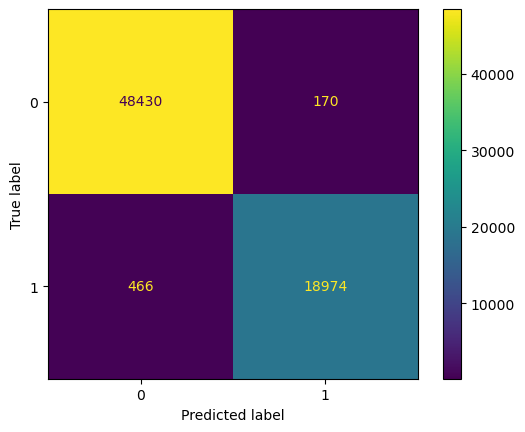

In [20]:
validate_model(voting_clf,X_train,y_train)

#### Stacking Classifier

Accuracy Mean= 99.52%
Accuracy Std= 0.00044
Precision= 99.03%
Recall= 99.28%
F1= 99.15%
ROC AUC= 99.45%


(0.9915491510621356, 0.9944701646090535)

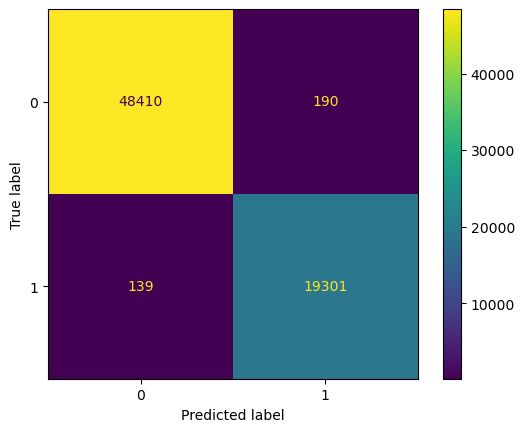

In [21]:
validate_model(staking_clf,X_train,y_train)

We see **Stacking Classifier** is miles better than **Voting** at Type1 Error.

## Performance on the test set

In [109]:
# Load Test Data
test_data = pd.read_csv("../data/test_data.csv")

In [103]:
# Load Data Pipeline to process Raw Test Data
with open("../pipelines/pipeline.pkl", "rb") as f:
    pipeline = cloudpickle.load(f)

In [110]:
X_test,y_test = test_data.drop("isFraud",axis=1),test_data['isFraud']

In [112]:
X_test_processed = pipeline.transform(X_test)

In [116]:
y_pred = staking_clf.predict(X_test_processed)
y_pred

array([1, 1, 0, ..., 0, 1, 1], dtype=int64)

In [120]:
from sklearn.metrics import accuracy_score
print(f"Accuracy= {accuracy_score(y_test,y_pred):.2%}")
print(f"Precision= {precision_score(y_test,y_pred):.2%}")
print(f"Recall= {recall_score(y_test,y_pred):.2%}")
print(f"F1= {f1_score(y_test,y_pred):.2%}")
print(f"ROC AUC= {roc_auc_score(y_test,y_pred):.2%}")

Accuracy= 99.62%
Precision= 99.37%
Recall= 99.29%
F1= 99.33%
ROC AUC= 99.52%


Wow, amazing.

# 07 Solution Presentation

- **1. Problem Framing:** Defined the business objective, how our solution will be used and performance measurement and the minimum.

- **2. Data Collection:** Listed data and how much we need, check legal obligation and authorization and we load and sample the data. 

- **3. Data Exploration:** Explored basic infos about the data and Advanced Analysis(Univariate,Bivariate,Multivariate), Outliers Detection, Correlations and Time Series analysis, ...

- **4. Data Processing:** Performs cleaning data, feature engineering, scaling numerical features and transforming categorical ones, created **Data Pipeline** and store it with all other pipelines.

- **5. Shortlist Promising Models:** With the assumptions from the previous sections, we trained many ml models (simple and complex) and select top most promising models which make different types of errors and we store them.

- **6. Fine-Tuning the System:** Fine-tuned the selected models form previous section and then using ensemble learning methods (hard voting, stacking) so we get an amazing models while the stacking model were better and we store them both also, then test its generalization using the test set.